VISUALING THE DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


MOUNTING GOOGLE DRIVE TO LOAD DATA.BEFORE RUNNING THIS COLAB PLEASE PUT 15 MIN HISTORICAL DATA IN GDRIVE.HERE I AM LOADING ZIP FILE PROVIDED BY ZELTA LABS AND FROM THAT ZIP FILE ACCESSING 15 MIN DATA

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')
zip_file_path = '/content/gdrive/MyDrive/ANSYS/KDSH Data-20240107T083138Z-001.zip'
import zipfile
import os

output_dir = '/content/unzipped_files'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Assuming your data is in a CSV file
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])


In [ ]:
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142610 entries, 0 to 142609
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  142610 non-null  datetime64[ns]
 1   open      142610 non-null  float64       
 2   high      142610 non-null  float64       
 3   low       142610 non-null  float64       
 4   close     142610 non-null  float64       
 5   volume    142610 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.5 MB
None
             datetime      open      high       low     close      volume
0 2018-01-01 05:30:00  13715.65  13715.65  13400.01  13556.15  123.616013
1 2018-01-01 05:45:00  13533.75  13550.87  13402.00  13521.12   98.136430
2 2018-01-01 06:00:00  13500.00  13545.37  13450.00  13470.41   79.904037
3 2018-01-01 06:15:00  13494.65  13690.87  13450.00  13529.01  141.699719
4 2018-01-01 06:30:00  13528.99  13571.74  13402.28  13445.63   72.537533
      

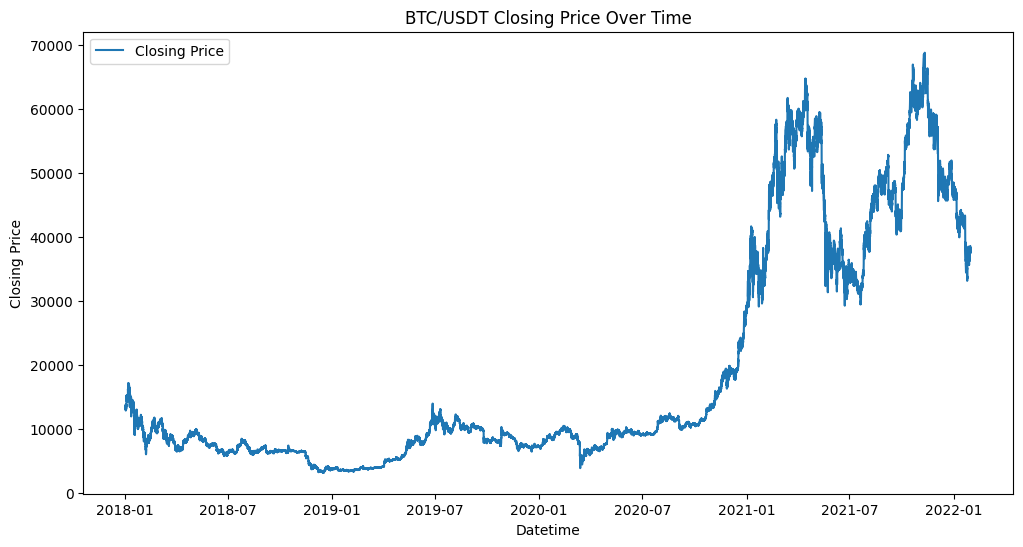

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Closing Price')
plt.title('BTC/USDT Closing Price Over Time')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


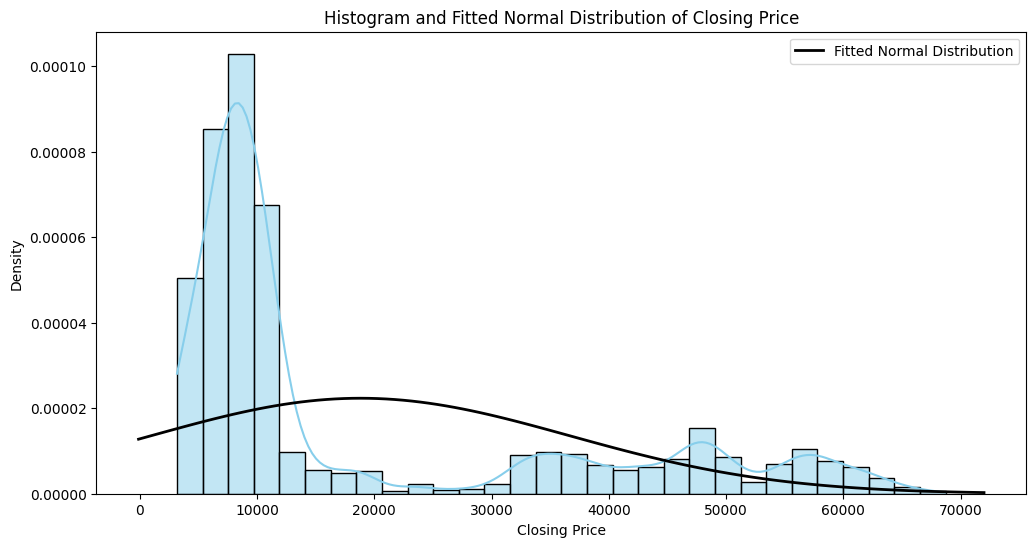

In [ ]:
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Assuming 'close' is the closing price column
closing_price = df['close']

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(closing_price, bins=30, kde=True, color='skyblue', stat='density')
plt.title('Histogram and Fitted Normal Distribution of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')

# Fit a normal distribution to the data
mu, std = norm.fit(closing_price)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.legend()
plt.show()


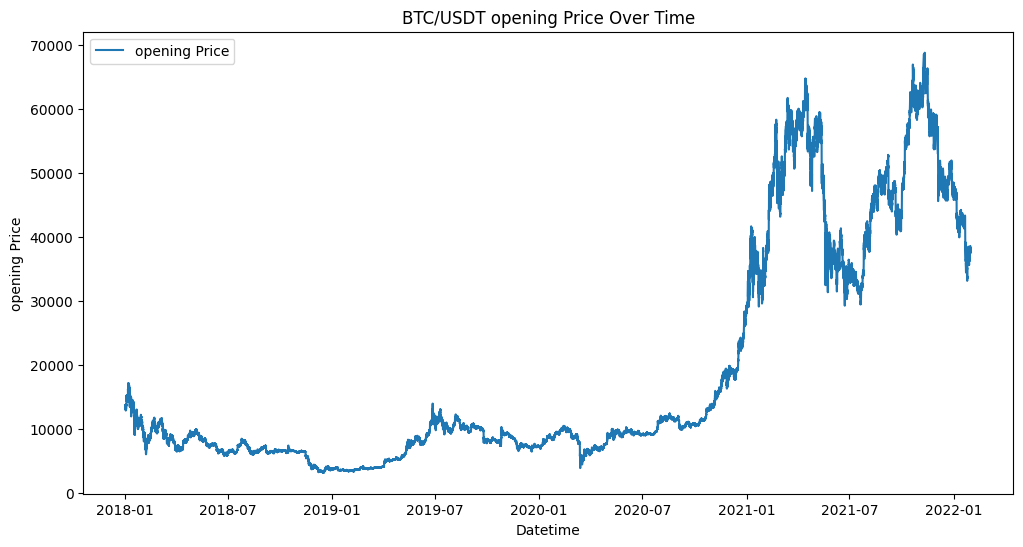

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['open'], label='opening Price')
plt.title('BTC/USDT opening Price Over Time')
plt.xlabel('Datetime')
plt.ylabel('opening Price')
plt.legend()
plt.show()

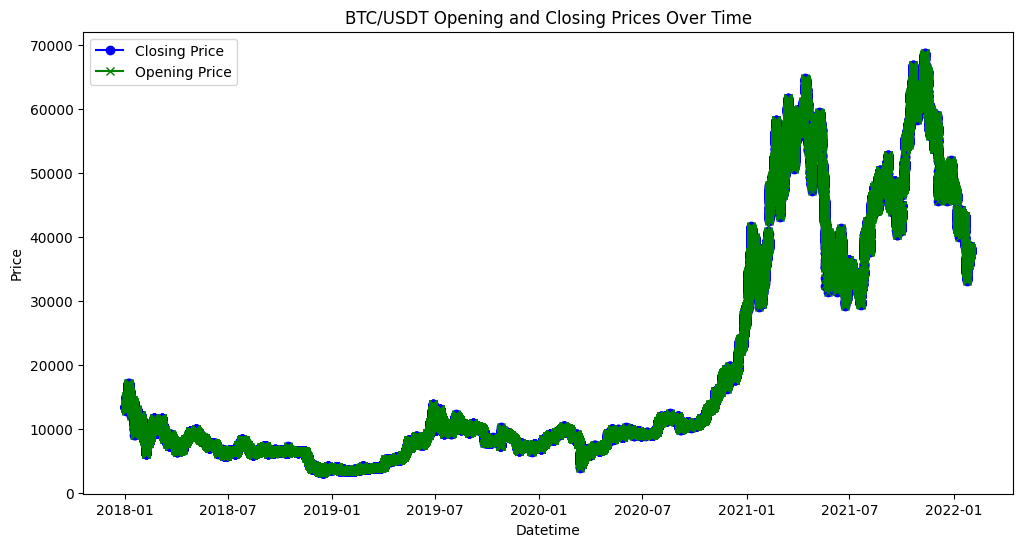

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains 'datetime', 'open', and 'close' columns
plt.figure(figsize=(12, 6))

# Line plot for closing prices
plt.plot(df['datetime'], df['close'], label='Closing Price', color='blue', marker='o')

# Line plot for opening prices
plt.plot(df['datetime'], df['open'], label='Opening Price', color='green', marker='x')

plt.title('BTC/USDT Opening and Closing Prices Over Time')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


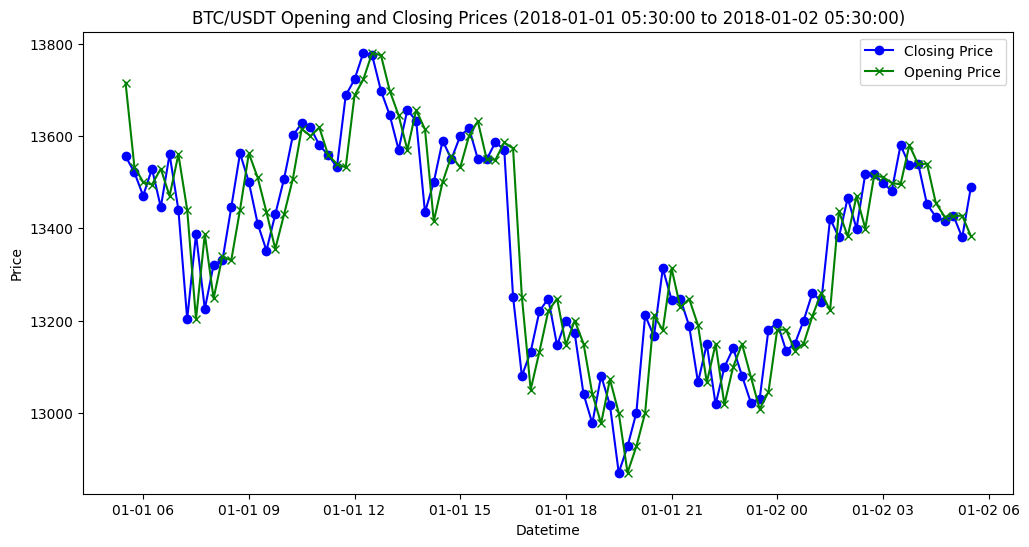

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains 'datetime', 'open', and 'close' columns

# Specify the desired duration
start_date = '2018-01-01 05:30:00'
end_date = '2018-01-02 05:30:00'

# Filter the DataFrame based on the specified duration
filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

plt.figure(figsize=(12, 6))

# Line plot for closing prices
plt.plot(filtered_df['datetime'], filtered_df['close'], label='Closing Price', color='blue', marker='o')

# Line plot for opening prices
plt.plot(filtered_df['datetime'], filtered_df['open'], label='Opening Price', color='green', marker='x')

plt.title(f'BTC/USDT Opening and Closing Prices ({start_date} to {end_date})')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


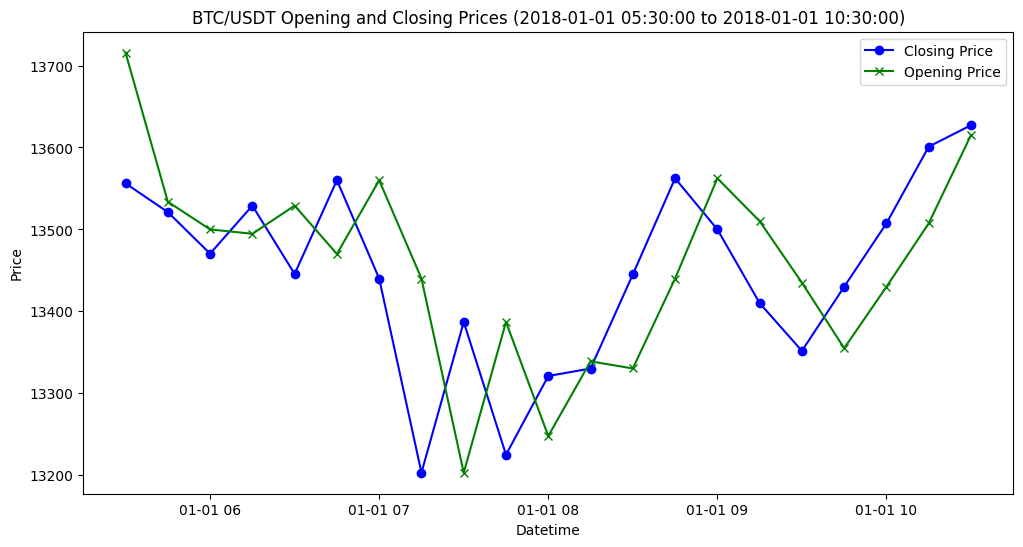

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains 'datetime', 'open', and 'close' columns

# Specify the desired duration
start_date = '2018-01-01 05:30:00'
end_date = '2018-01-01 10:30:00'

# Filter the DataFrame based on the specified duration
filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

plt.figure(figsize=(12, 6))

# Line plot for closing prices
plt.plot(filtered_df['datetime'], filtered_df['close'], label='Closing Price', color='blue', marker='o')

# Line plot for opening prices
plt.plot(filtered_df['datetime'], filtered_df['open'], label='Opening Price', color='green', marker='x')

plt.title(f'BTC/USDT Opening and Closing Prices ({start_date} to {end_date})')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
print("Statistical Summary:")
print(df[['open', 'high', 'low', 'close', 'volume']].describe())


Statistical Summary:
                open           high            low          close  \
count  142610.000000  142610.000000  142610.000000  142610.000000   
mean    18807.280243   18862.767015   18749.494799   18807.443372   
std     17870.519046   17924.354516   17815.091326   17870.588409   
min      3166.110000    3174.780000    3156.260000    3167.070000   
25%      7135.375000    7150.000000    7119.990000    7135.470000   
50%      9532.090000    9552.575000    9510.960000    9532.230000   
75%     32660.737500   32799.980000   32531.385000   32663.150000   
max     68718.890000   69000.000000   68480.000000   68718.900000   

              volume  
count  142610.000000  
mean      568.932327  
std       638.674577  
min         0.000000  
25%       241.014968  
50%       390.699959  
75%       658.659670  
max     20821.081669  


In [ ]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


<ipython-input-15-7f48d07d051d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


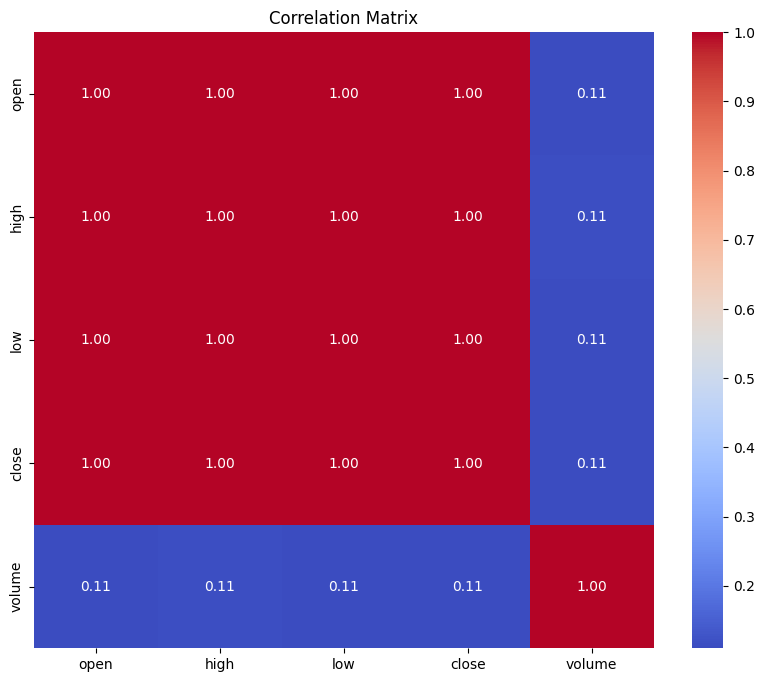

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


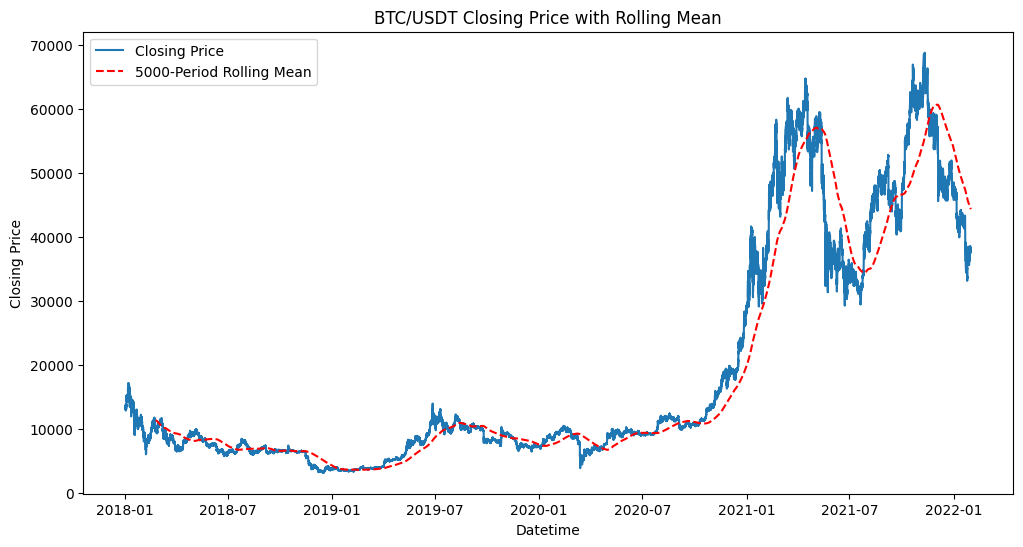

In [ ]:
window_size = 5000
df['close_rolling_mean'] = df['close'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Closing Price')
plt.plot(df['datetime'], df['close_rolling_mean'], label=f'{window_size}-Period Rolling Mean', linestyle='--', color='red')
plt.title('BTC/USDT Closing Price with Rolling Mean')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


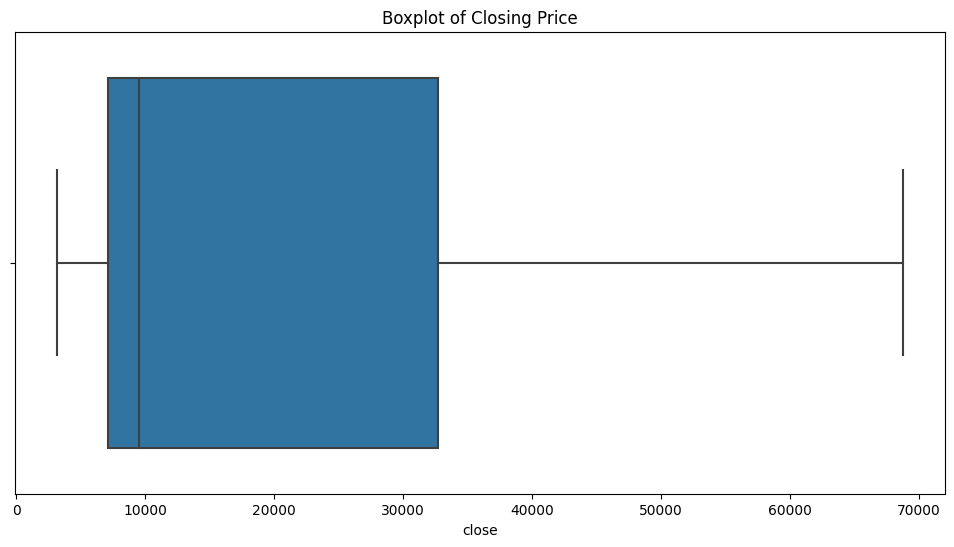

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['close'])
plt.title('Boxplot of Closing Price')
plt.show()


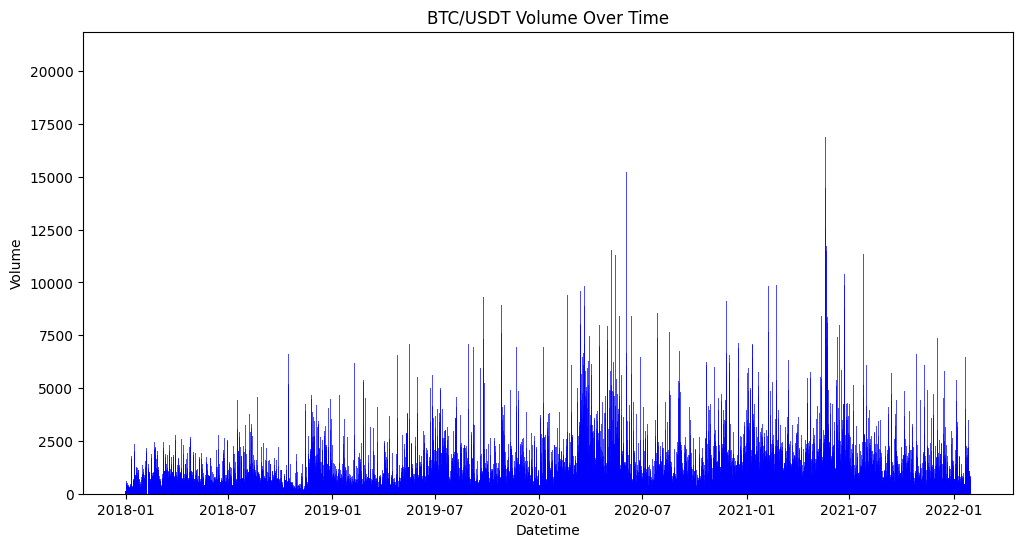

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['datetime'], df['volume'], color='blue', alpha=0.7)
plt.title('BTC/USDT Volume Over Time')
plt.xlabel('Datetime')
plt.ylabel('Volume')
plt.show()


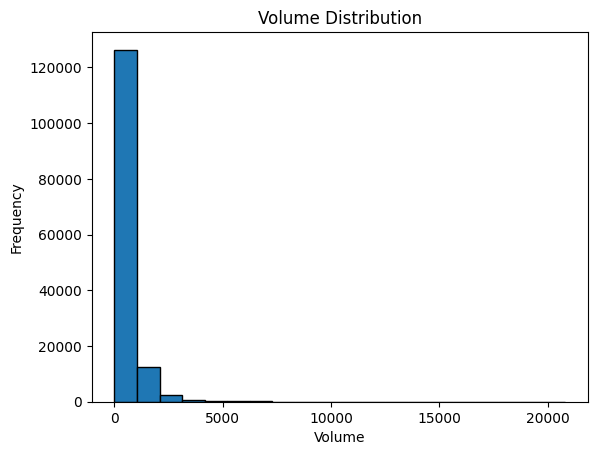

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['volume'], bins=20, edgecolor='black')
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


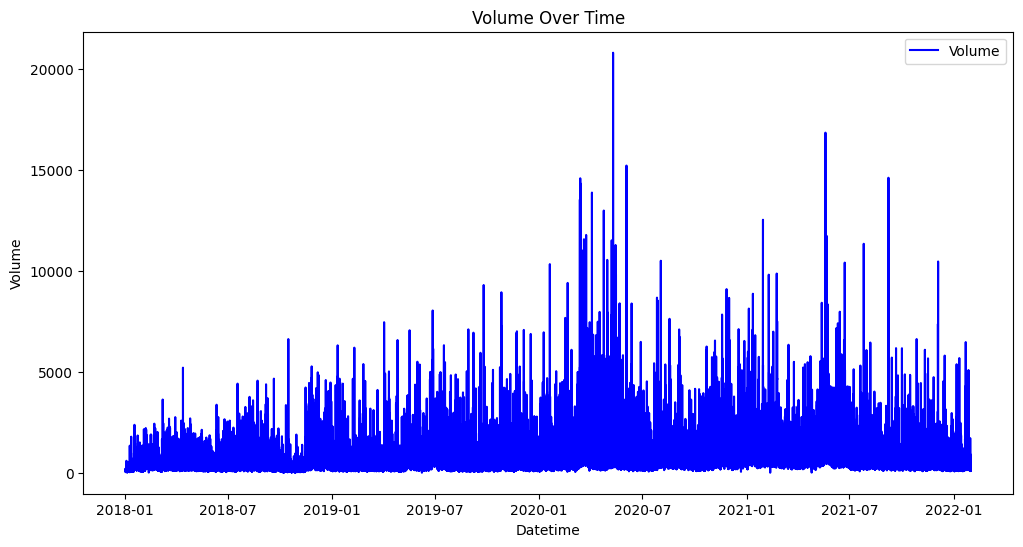

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['volume'], label='Volume', color='blue')
plt.title('Volume Over Time')
plt.xlabel('Datetime')
plt.ylabel('Volume')
plt.legend()
plt.show()


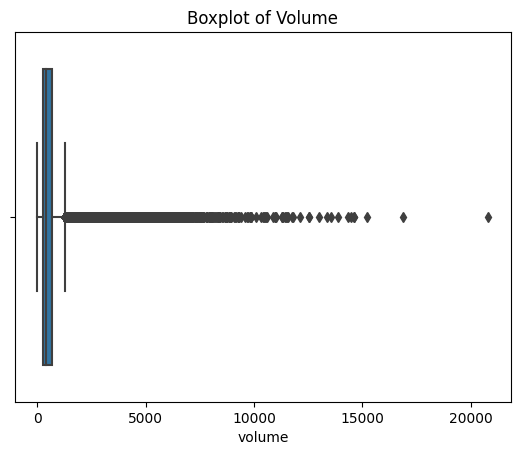

In [ ]:
import seaborn as sns

sns.boxplot(x=df['volume'])
plt.title('Boxplot of Volume')
plt.show()


In [ ]:
correlation_matrix = df.corr()
volume_correlation = correlation_matrix['volume'].sort_values(ascending=False)
print(volume_correlation)


volume                1.000000
high                  0.114030
open                  0.112130
close                 0.111953
close_rolling_mean    0.109730
low                   0.109696
Name: volume, dtype: float64


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


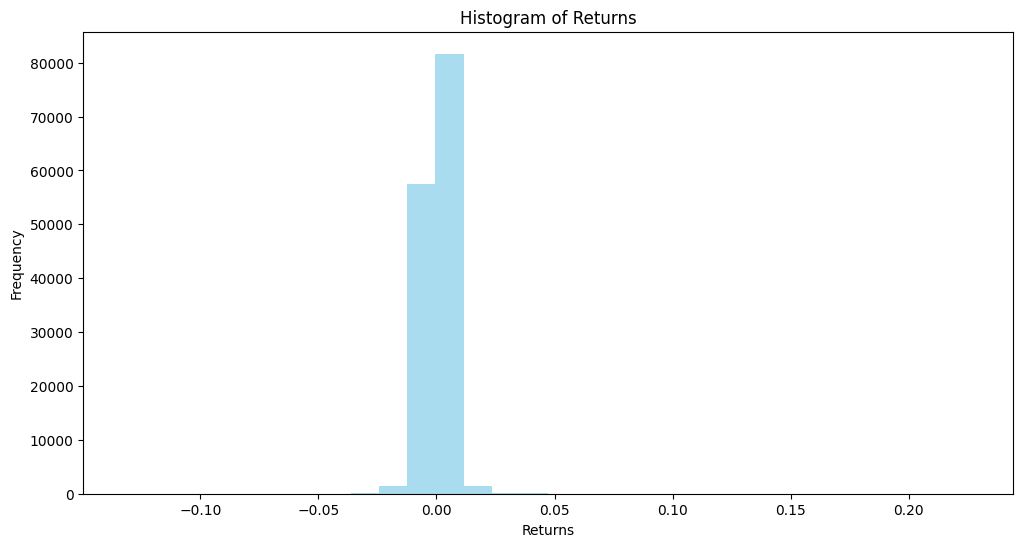

In [ ]:
returns = df['close'].pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.hist(returns, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


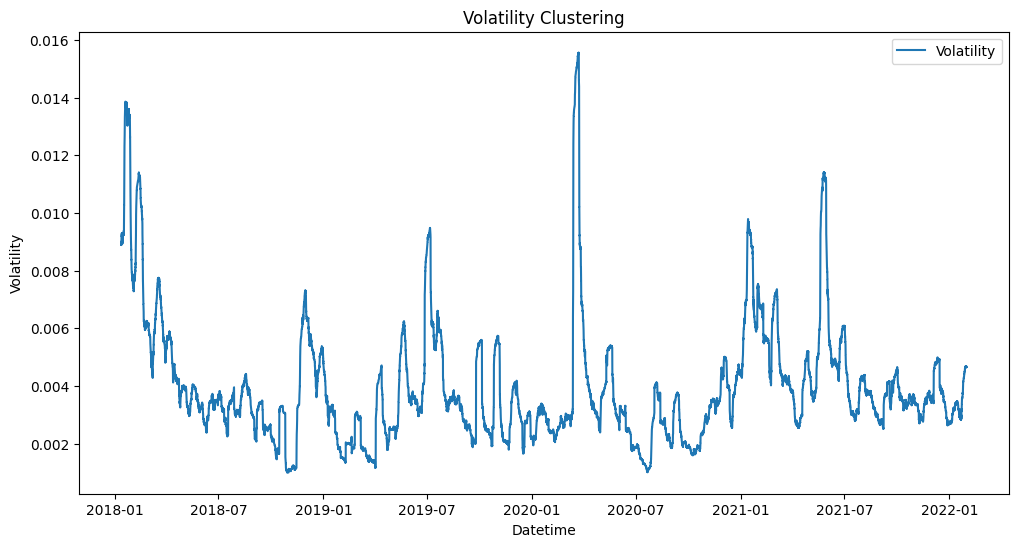

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'].pct_change().rolling(window=1000).std(), label='Volatility')
plt.title('Volatility Clustering')
plt.xlabel('Datetime')
plt.ylabel('Volatility')
plt.legend()
plt.show()


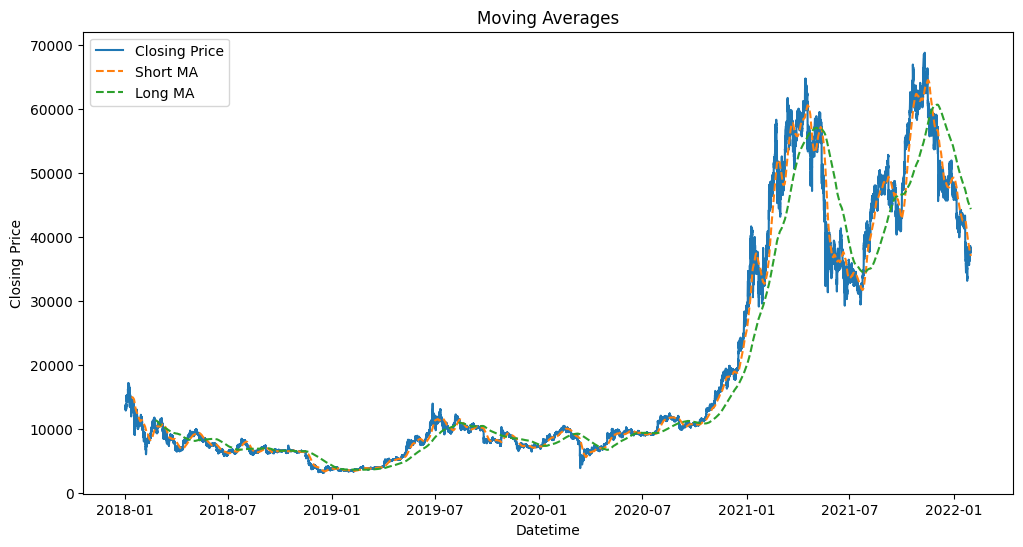

In [ ]:
df['short_MA'] = df['close'].rolling(window=1000).mean()
df['long_MA'] = df['close'].rolling(window=5000).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Closing Price')
plt.plot(df['datetime'], df['short_MA'], label='Short MA', linestyle='--')
plt.plot(df['datetime'], df['long_MA'], label='Long MA', linestyle='--')
plt.title('Moving Averages')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


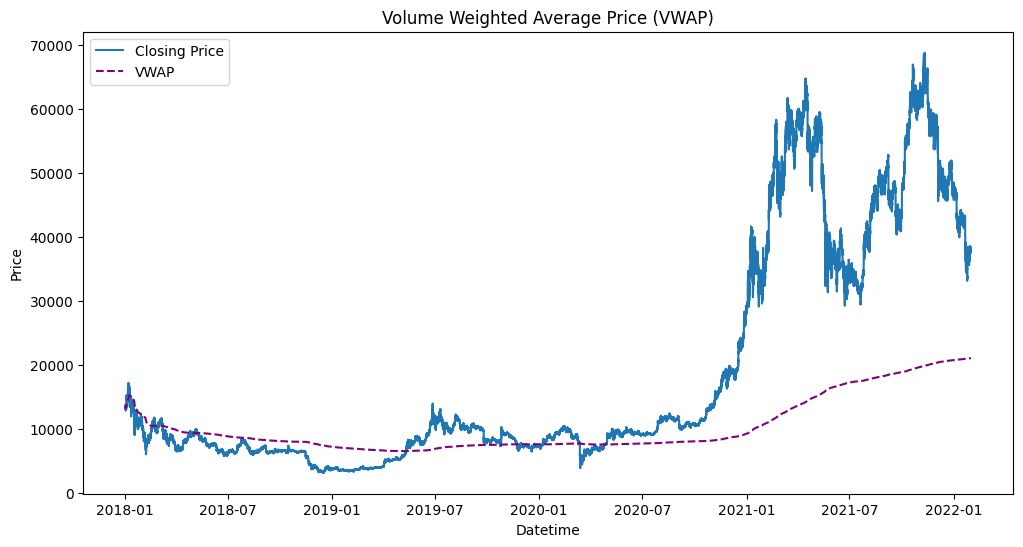

In [ ]:
df['VWAP'] = (df['volume'] * (df['high'] + df['low'] + df['close']) / 3).cumsum() / df['volume'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Closing Price')
plt.plot(df['datetime'], df['VWAP'], label='VWAP', linestyle='--', color='purple')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


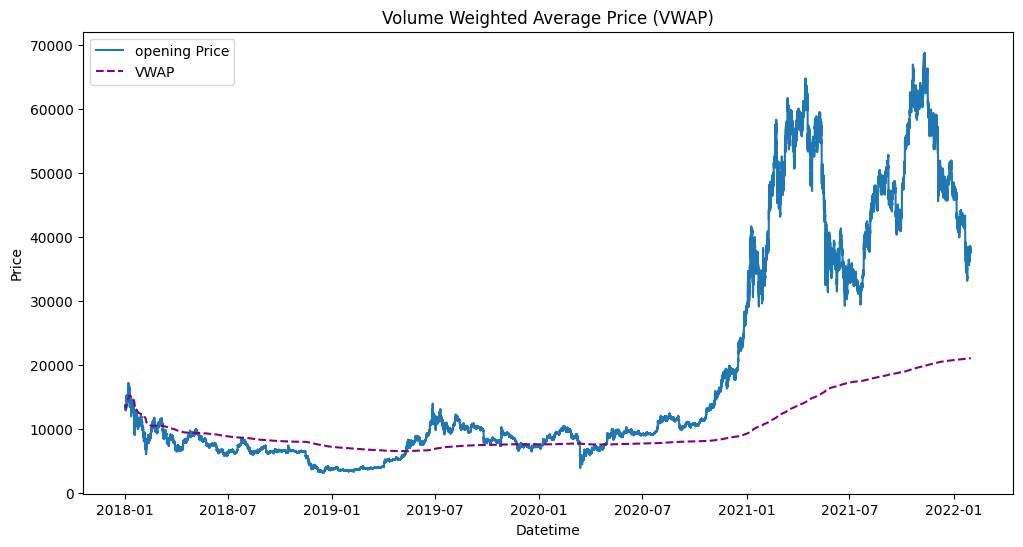

In [ ]:
df['VWAP'] = (df['volume'] * (df['high'] + df['low'] + df['close']) / 3).cumsum() / df['volume'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['open'], label='opening Price')
plt.plot(df['datetime'], df['VWAP'], label='VWAP', linestyle='--', color='purple')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


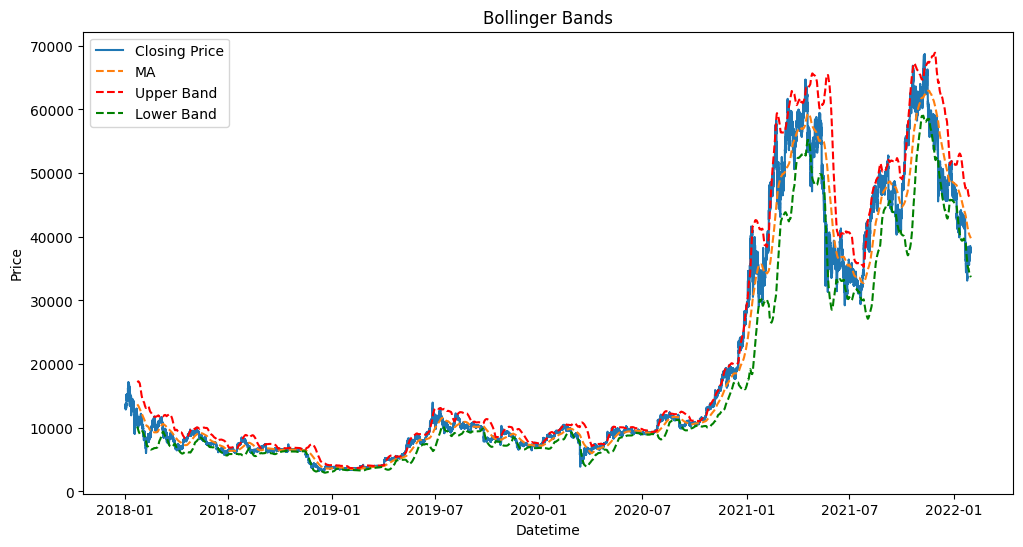

In [ ]:
df['MA'] = df['close'].rolling(window=2000).mean()
df['UpperBand'] = df['MA'] + 2 * df['close'].rolling(window=2000).std()
df['LowerBand'] = df['MA'] - 2 * df['close'].rolling(window=2000).std()

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Closing Price')
plt.plot(df['datetime'], df['MA'], label='MA', linestyle='--')
plt.plot(df['datetime'], df['UpperBand'], label='Upper Band', linestyle='--', color='red')
plt.plot(df['datetime'], df['LowerBand'], label='Lower Band', linestyle='--', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()


FITTING NORMAL TRADING STRATEGY BASED ON STATISTICS


STRATEGY-1 ITERATION

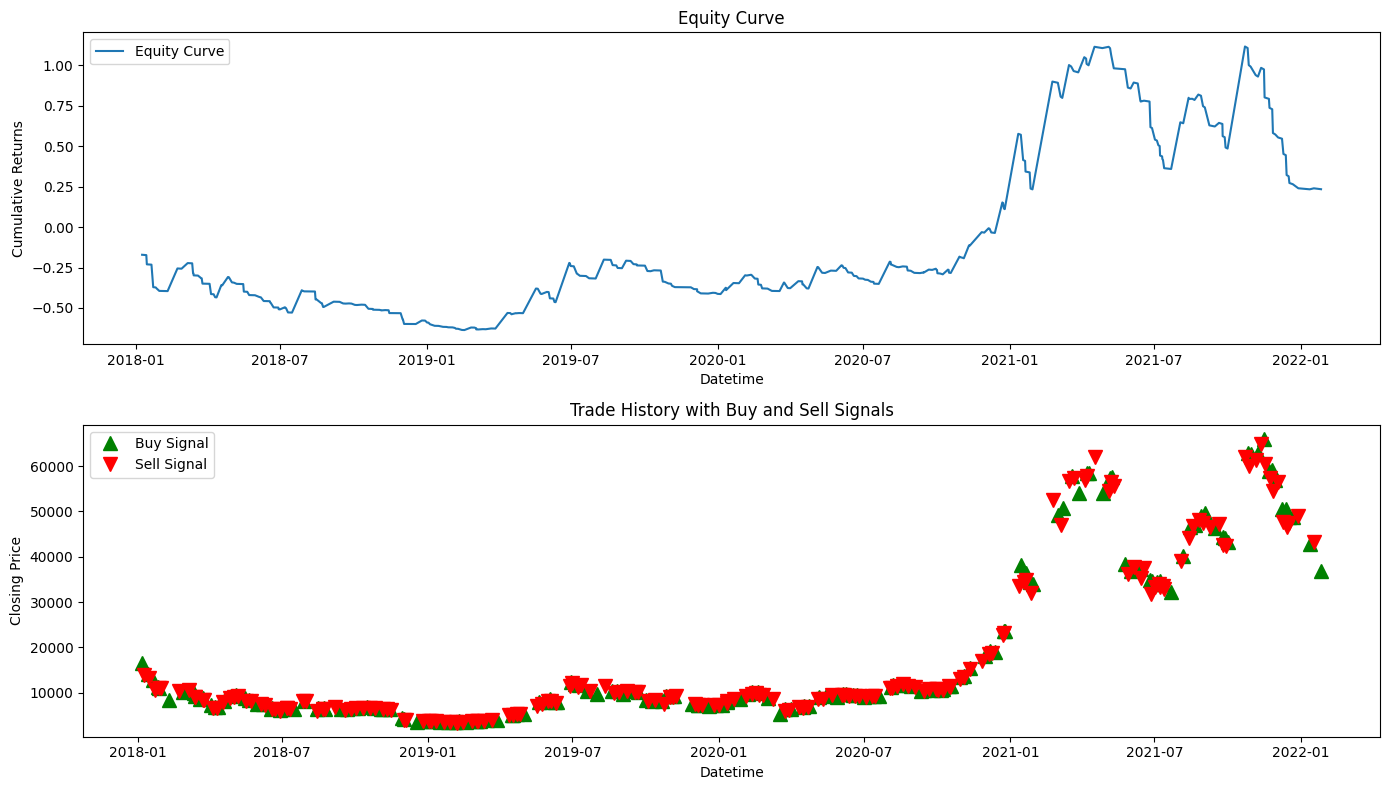

Sharpe Ratio: 0.6038
Annualized Returns: 0.0015
Maximum Drawdown: -0.6364
               datetime action     price position       capital  \
0   2018-01-06 12:00:00    Buy  16659.99        1   9975.010015   
1   2018-01-08 20:30:00   Sell  13845.00        0   8268.794118   
2   2018-01-14 03:30:00    Buy  14198.00        1   8247.497118   
3   2018-01-14 19:00:00   Sell  13253.00        0   7678.675177   
4   2018-01-20 14:15:00    Buy  12818.00        1   7659.448177   
..                  ...    ...       ...      ...           ...   
360 2021-12-21 17:15:00    Buy  48866.92        1  12620.719128   
361 2021-12-28 16:30:00   Sell  49008.75        0  12368.304746   
362 2022-01-12 00:30:00    Buy  42750.00        1  12304.179746   
363 2022-01-17 04:15:00   Sell  43190.01        0  12366.037120   
364 2022-01-26 04:45:00    Buy  36927.12        1  12310.646440   

     transaction_cost     stop_loss  target_price  
0           24.989985  16531.191151  16831.721799  
1           20.76

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Load historical data
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Handle missing data
df.dropna(inplace=True)

# Calculate short-term and long-term moving averages
short_window = 100
long_window = 500

df['short_ma'] = df['close'].rolling(window=short_window).mean()
df['long_ma'] = df['close'].rolling(window=long_window).mean()

# Define trading signals based on moving average crossover
df['signal'] = 0  # Placeholder for signals

# Generate signals based on strategy
df.loc[df['short_ma'] > df['long_ma'], 'signal'] = 1  # Buy signal
df.loc[df['short_ma'] < df['long_ma'], 'signal'] = -1  # Sell signal

# Create a log DataFrame to store trade details
log = pd.DataFrame(columns=['datetime', 'action', 'price', 'position', 'capital', 'transaction_cost', 'stop_loss', 'target_price'])

# Risk Management Parameters
risk_per_trade = 0.02  # Risk 2% of capital per trade
reward_to_risk_ratio = 2  # Set the risk-reward ratio
atr_window = 140  # ATR window for dynamic stop-loss calculation

# Initialize variables
position = 0  # 0: no position, 1: long position, -1: short position
buy_price = 0  # Price at which buy trade was executed
initial_capital = 10000  # User's initial capital
capital = initial_capital  # Current capital
transaction_cost_rate = 0.0015  # 0.15% transaction cost

# Generate log entries for each trade
for i in range(1, len(df)):
    if df['signal'][i] != df['signal'][i - 1]:  # Signal changed
        if df['signal'][i] == 1:  # Buy signal
            position = 1
            buy_price = df['close'][i]
            atr = df['close'].iloc[i - atr_window:i].diff().abs().mean()  # Calculate Average True Range (ATR)

            max_loss_price = buy_price - atr * 1.5  # Set dynamic stop-loss level
            target_price = buy_price + atr * reward_to_risk_ratio  # Set target price for risk-reward ratio

            transaction_cost = buy_price * transaction_cost_rate
            capital -= transaction_cost
            log = pd.concat([log, pd.DataFrame({'datetime': [df.index[i]], 'action': ['Buy'], 'price': [buy_price],
                                                 'position': [position], 'capital': [capital],
                                                 'transaction_cost': [transaction_cost],
                                                 'stop_loss': [max_loss_price],
                                                 'target_price': [target_price]})], ignore_index=True)
        elif df['signal'][i] == -1:  # Sell signal
            if position == 1:  # Closing a long position
                position = 0
                sell_price = df['close'][i]
                transaction_cost = sell_price * transaction_cost_rate

                # Implementing dynamic stop-loss and risk-reward ratio
                if sell_price <= log['stop_loss'].iloc[-1]:
                    capital = capital * (sell_price / buy_price) - transaction_cost
                elif sell_price >= log['target_price'].iloc[-1]:
                    capital = capital * (sell_price / buy_price) - transaction_cost
                else:
                    capital = min(capital * (sell_price / buy_price) - transaction_cost, capital * (1 - risk_per_trade))

                log = pd.concat([log, pd.DataFrame({'datetime': [df.index[i]], 'action': ['Sell'], 'price': [sell_price],
                                                     'position': [position], 'capital': [capital],
                                                     'transaction_cost': [transaction_cost],
                                                     'stop_loss': [log['stop_loss'].iloc[-1]],
                                                     'target_price': [log['target_price'].iloc[-1]]})], ignore_index=True)

# Performance Metrics
daily_returns = log['capital'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1

sharpe_ratio = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())
annualized_returns = ((1 + cumulative_returns.iloc[-1]) ** (252 / len(df.index) / (15 / 60))) - 1  # Adjusting for 15-minute data

max_drawdown = np.min(cumulative_returns)

# Visualizations
plt.figure(figsize=(14, 8))

# Plotting the equity curve
plt.subplot(2, 1, 1)
plt.plot(log['datetime'], cumulative_returns, label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.legend()

# Plotting the trade history
plt.subplot(2, 1, 2)
plt.plot(log[log['action'] == 'Buy']['datetime'], log[log['action'] == 'Buy']['price'],
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(log[log['action'] == 'Sell']['datetime'], log[log['action'] == 'Sell']['price'],
         'v', markersize=10, color='r', label='Sell Signal')
plt.title('Trade History with Buy and Sell Signals')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()

# Display performance metrics
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
print(f'Annualized Returns: {annualized_returns:.4f}')
print(f'Maximum Drawdown: {max_drawdown:.4f}')

# Display the trade log
print(log)


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


ML MODELS


STRATEGY-2 ITERATION

Random Forest Classifier


<ipython-input-6-b3e6b68a6187>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['label'] = df_features['signal'].shift(-1)
<ipython-input-6-b3e6b68a6187>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(inplace=True)


Model Accuracy: 95.96%


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.1

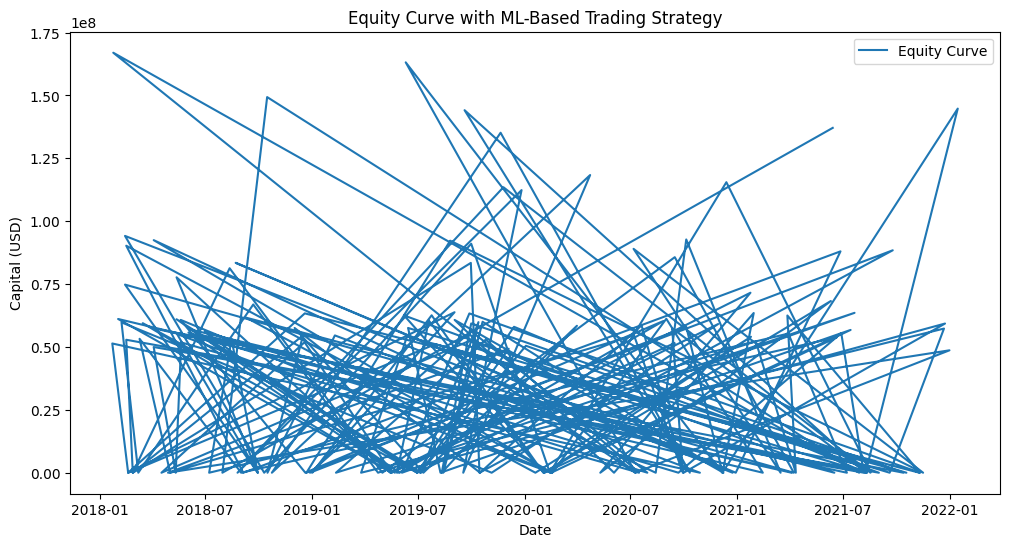

Net Profit after the backtesting period: $6592066177.45
Sharpe Ratio: 14.72
Annualized Returns: 7.85%
Cumulative Returns: 515183.49%
Maximum Drawdown: -100.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load historical data
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Handle missing data
df.dropna(inplace=True)

# Define additional indicators and strategies

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['rolling_mean'] = data['close'].rolling(window=window).mean()
    data['upper_band'] = data['rolling_mean'] + num_std_dev * data['close'].rolling(window=window).std()
    data['lower_band'] = data['rolling_mean'] - num_std_dev * data['close'].rolling(window=window).std()

def calculate_adx(data, window=14):
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())

    tr = pd.DataFrame({'high_low': high_low, 'high_close': high_close, 'low_close': low_close})
    true_range = tr.max(axis=1)
    data['average_true_range'] = true_range.rolling(window=window).mean()

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['short_ema'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['long_ema'] = data['close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['short_ema'] - data['long_ema']
    data['signal'] = data['macd'].ewm(span=signal_window, adjust=False).mean()

def calculate_rsi(data, window=14):
    diff = data['close'].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    data['rsi'] = 100 - (100 / (1 + rs))

def generate_signals_advanced(data):
    data['signal'] = 0  # Placeholder for signals

    # Buy signal: Simple Moving Average Crossover
    short_window = 150
    long_window = 2000

    data['short_ma'] = data['close'].rolling(window=short_window).mean()
    data['long_ma'] = data['close'].rolling(window=long_window).mean()

    buy_condition = (data['short_ma'] > data['long_ma']) & (data['close'] < data['lower_band']) & (data['average_true_range'] > 0.5)
    data.loc[buy_condition, 'signal'] = 1

    # Sell signal: Simple Moving Average Crossover
    sell_condition = (data['short_ma'] < data['long_ma']) & (data['close'] > data['upper_band']) & (data['rsi'] > 70)
    data.loc[sell_condition, 'signal'] = -1

    # Hold condition
    hold_condition = (data['signal'] == 0)
    data.loc[hold_condition, 'signal'] = 0

# Apply additional calculations
calculate_bollinger_bands(df)
calculate_adx(df)
calculate_macd(df)
calculate_rsi(df)  # Add RSI calculation

# Generate advanced trading signals
generate_signals_advanced(df)

# Feature Engineering
features = ['close', 'upper_band', 'lower_band', 'average_true_range', 'macd', 'signal', 'rsi']
df_features = df[features]

# Create binary labels for classification (1: Buy, -1: Sell, 0: Hold)
df_features['label'] = df_features['signal'].shift(-1)
df_features.dropna(inplace=True)

# Split the data into features and labels
X = df_features.drop('label', axis=1)
y = df_features['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2%}')

# Transaction costs and slippage
transaction_cost_rate = 0.0015  # 0.15% per transaction
slippage_rate = 0.002  # 0.2% slippage

# Backtesting and Risk Management (Assuming fixed capital)
capital = 10000
position = 0
buy_price = 0
net_profit = 0

log = pd.DataFrame(columns=['datetime', 'action', 'price', 'position', 'capital', 'transaction_cost'])

for i in range(len(X_test)):
    prediction = clf.predict([X_test.iloc[i]])
    current_price = df_features['close'].iloc[i]

    if prediction == 1 and position != 1:  # Buy signal
        position = 1
        buy_price = current_price * (1 + slippage_rate)
        capital *= (1 - transaction_cost_rate)  # Apply transaction cost
        capital /= buy_price
        log = log.append({'datetime': X_test.index[i], 'action': 'Buy', 'price': buy_price,
                          'position': position, 'capital': capital, 'transaction_cost': capital * transaction_cost_rate},
                         ignore_index=True)

    elif prediction == -1 and position != -1:  # Sell signal
        position = -1
        sell_price = current_price * (1 - slippage_rate)
        capital *= (1 - transaction_cost_rate)  # Apply transaction cost
        capital *= sell_price
        net_profit += capital - 10000  # Assuming initial capital was $10,000
        log = log.append({'datetime': X_test.index[i], 'action': 'Sell', 'price': sell_price,
                          'position': position, 'capital': capital, 'transaction_cost': capital * transaction_cost_rate},
                         ignore_index=True)

# Calculate additional performance metrics
daily_returns = log['capital'].pct_change()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)  # Assuming 252 trading days in a year
annualized_returns = (capital / 10000) ** (252 / len(X_test.index)) - 1
cumulative_returns = (capital / 10000) - 1

# Maximum Drawdown Calculation
rolling_max = log['capital'].cummax()
drawdown = (log['capital'] / rolling_max) - 1
max_drawdown = drawdown.min()

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(log['datetime'], log['capital'], label='Equity Curve')
plt.title('Equity Curve with ML-Based Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Capital (USD)')
plt.legend()
plt.show()

# Display Backtesting Results
print(f'Net Profit after the backtesting period: ${net_profit:.2f}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Annualized Returns: {annualized_returns:.2%}')
print(f'Cumulative Returns: {cumulative_returns:.2%}')
print(f'Maximum Drawdown: {max_drawdown:.2%}')

# Additional visualizations and analysis can be added based on specific requirements.


STRATEGY: 3-ITERATION


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.1

Net Profit after the backtesting period: $3542964676.68
Annualized Returns: 2182.95%
Maximum Drawdown: -81.56%
Sharpe Ratio: -0.16


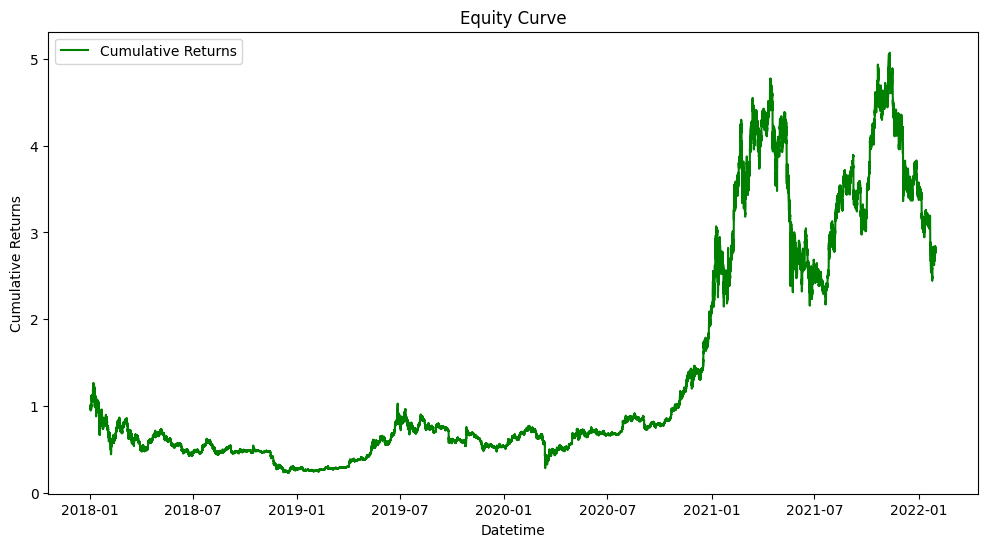

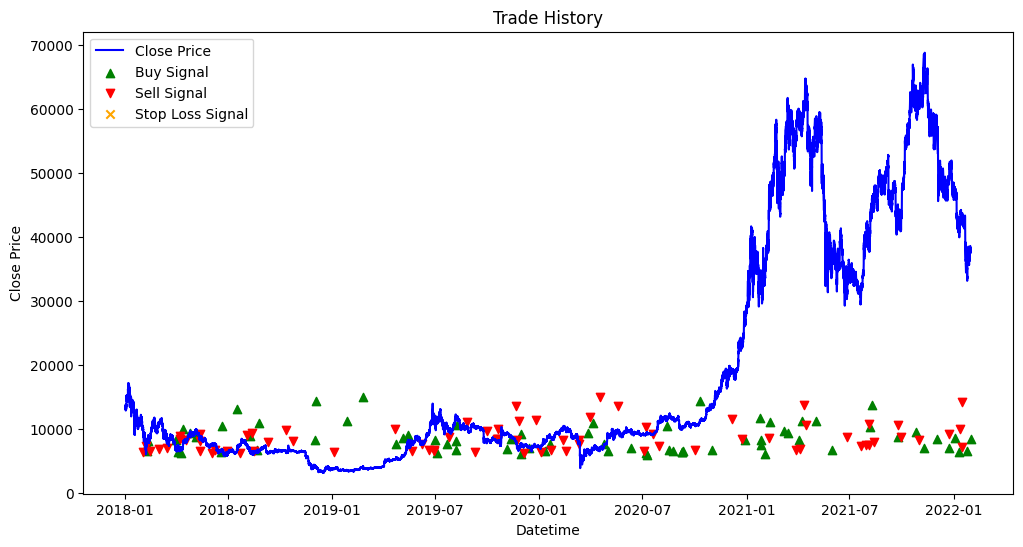

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load historical data
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Handle missing data
df.dropna(inplace=True)

# Define additional indicators and strategies
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['rolling_mean'] = data['close'].rolling(window=window).mean()
    data['upper_band'] = data['rolling_mean'] + num_std_dev * data['close'].rolling(window=window).std()
    data['lower_band'] = data['rolling_mean'] - num_std_dev * data['close'].rolling(window=window).std()

def calculate_adx(data, window=14):
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())

    tr = pd.DataFrame({'high_low': high_low, 'high_close': high_close, 'low_close': low_close})
    true_range = tr.max(axis=1)
    data['average_true_range'] = true_range.rolling(window=window).mean()

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['short_ema'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['long_ema'] = data['close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['short_ema'] - data['long_ema']
    data['signal'] = data['macd'].ewm(span=signal_window, adjust=False).mean()

def calculate_rsi(data, window=14):
    diff = data['close'].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    data['rsi'] = 100 - (100 / (1 + rs))

def generate_signals_risk_management(data):
    data['signal'] = 0  # Placeholder for signals

    # Buy signal: Simple Moving Average Crossover
    short_window = 150
    long_window = 2000

    data['short_ma'] = data['close'].rolling(window=short_window).mean()
    data['long_ma'] = data['close'].rolling(window=long_window).mean()

    buy_condition = (data['short_ma'] > data['long_ma']) & (data['close'] < data['lower_band']) & (data['average_true_range'] > 0.5)
    data.loc[buy_condition, 'signal'] = 1

    # Sell signal: Simple Moving Average Crossover
    sell_condition = (data['short_ma'] < data['long_ma']) & (data['close'] > data['upper_band']) & (data['rsi'] > 70)
    data.loc[sell_condition, 'signal'] = -1

    # Hold condition
    hold_condition = (data['signal'] == 0)
    data.loc[hold_condition, 'signal'] = 0

# Apply additional calculations
calculate_bollinger_bands(df)
calculate_adx(df)
calculate_macd(df)
calculate_rsi(df)  # Add RSI calculation

# Calculate moving averages
df['short_ma'] = df['close'].rolling(window=50).mean()
df['long_ma'] = df['close'].rolling(window=200).mean()

# Generate signals with risk management
generate_signals_risk_management(df)
# Feature Engineering
features = ['close', 'upper_band', 'lower_band', 'average_true_range', 'macd', 'signal', 'rsi']
df_features = df[features]

# Create binary labels for classification (1: Buy, -1: Sell, 0: Hold)
df_features['label'] = df_features['signal'].shift(-1)
df_features.dropna(inplace=True)

# Calculate stop-loss prices
df_features['stop_loss'] = df_features['close'] * 0.98  # 2% stop loss

# Split the data into features and labels
X = df_features.drop('label', axis=1)
y = df_features['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Backtesting and Risk Management (Assuming fixed capital)
capital = 10000
position = 0
buy_price = 0
net_profit = 0
trades = []

# Inside the backtesting loop
for i in range(len(X_test)):
    prediction = clf.predict([X_test.iloc[i]])
    current_price = df_features['close'].iloc[i]

    if prediction == 1 and position != 1:  # Buy signal
        position = 1
        buy_price = current_price
        capital *= 0.99  # Assuming 1% transaction cost
        capital /= buy_price
        stop_loss_price = df_features['stop_loss'].iloc[i]
        trades.append({'datetime': X_test.index[i], 'action': 'Buy', 'price': buy_price,
                       'position': position, 'capital': capital, 'stop_loss': stop_loss_price})

    elif prediction == -1 and position != -1:  # Sell signal
        position = -1
        sell_price = current_price
        capital *= 0.99  # Assuming 1% transaction cost
        capital *= sell_price
        net_profit += capital - 10000  # Assuming initial capital was $10,000
        stop_loss_price = df_features['stop_loss'].iloc[i]
        trades.append({'datetime': X_test.index[i], 'action': 'Sell', 'price': sell_price,
                       'position': position, 'capital': capital, 'stop_loss': stop_loss_price})

        # Check stop-loss condition
        if stop_loss_price is not None and current_price < stop_loss_price:
            position = 0
            capital *= 0.99  # Assuming 1% transaction cost
            capital *= current_price
            net_profit += capital - 10000
            trades.append({'datetime': X_test.index[i], 'action': 'Stop Loss', 'price': current_price,
                           'position': position, 'capital': capital, 'stop_loss': None})

# Performance Metrics
total_days = (df.index[-1] - df.index[0]).days
annualized_returns = (net_profit / 10000) ** (365 / total_days) - 1

# Calculate Daily Returns
df['daily_returns'] = df['close'].pct_change()

# Calculate Cumulative Returns
df['cumulative_returns'] = (1 + df['daily_returns']).cumprod()

# Calculate Maximum Drawdown
df['rolling_max'] = df['cumulative_returns'].cummax()
df['drawdown'] = (df['cumulative_returns'] / df['rolling_max']) - 1
max_drawdown = df['drawdown'].min()

# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assumed annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 365) - 1
daily_returns_excess = df['daily_returns'] - daily_risk_free_rate
sharpe_ratio = (daily_returns_excess.mean() / daily_returns_excess.std()) * np.sqrt(365)

# Print the results
print(f"Net Profit after the backtesting period: ${net_profit:.2f}")
print(f"Annualized Returns: {annualized_returns:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot equity curve
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cumulative_returns'], label='Cumulative Returns', color='green')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot trade history
trade_df = pd.DataFrame(trades)
buy_signals = trade_df[trade_df['action'] == 'Buy']
sell_signals = trade_df[trade_df['action'] == 'Sell']
stop_loss_signals = trade_df[trade_df['action'] == 'Stop Loss']

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.scatter(buy_signals['datetime'], buy_signals['price'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals['datetime'], sell_signals['price'], marker='v', color='red', label='Sell Signal')
plt.scatter(stop_loss_signals['datetime'], stop_loss_signals['price'], marker='x', color='orange', label='Stop Loss Signal')
plt.title('Trade History')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.legend()
plt.show()



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.1

Net Profit after the backtesting period: $8262633630.02
Annualized Returns: 2708.82%
Maximum Drawdown: -81.56%
Sharpe Ratio: -0.16


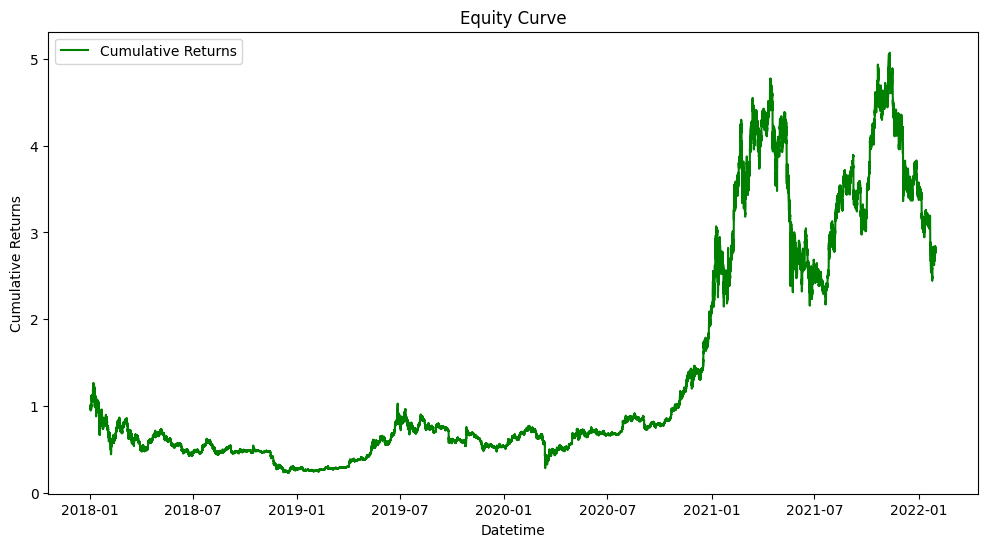

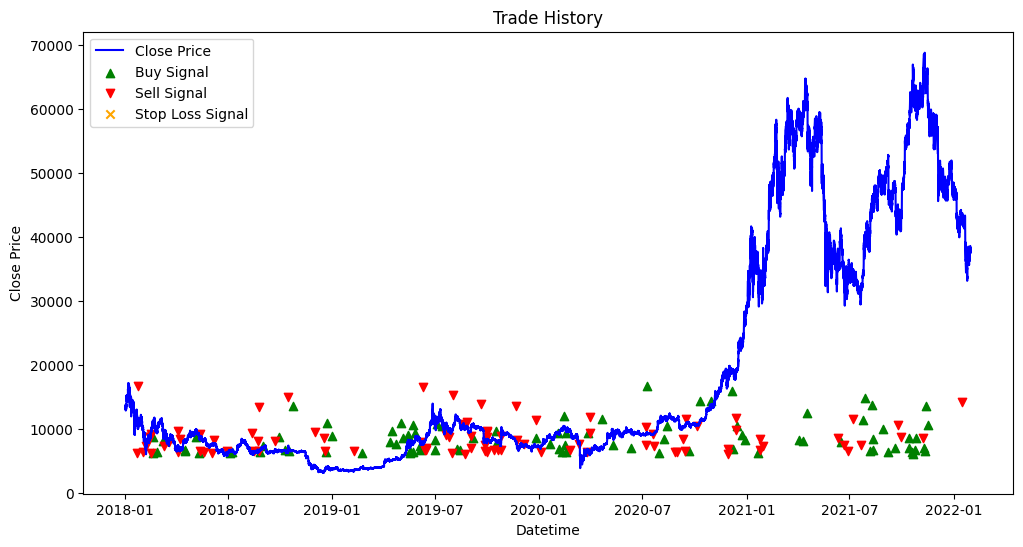

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load historical data
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Handle missing data
df.dropna(inplace=True)

# Define additional indicators and strategies
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['rolling_mean'] = data['close'].rolling(window=window).mean()
    data['upper_band'] = data['rolling_mean'] + num_std_dev * data['close'].rolling(window=window).std()
    data['lower_band'] = data['rolling_mean'] - num_std_dev * data['close'].rolling(window=window).std()

def calculate_adx(data, window=14):
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())

    tr = pd.DataFrame({'high_low': high_low, 'high_close': high_close, 'low_close': low_close})
    true_range = tr.max(axis=1)
    data['average_true_range'] = true_range.rolling(window=window).mean()

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['short_ema'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['long_ema'] = data['close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['short_ema'] - data['long_ema']
    data['signal'] = data['macd'].ewm(span=signal_window, adjust=False).mean()

def calculate_rsi(data, window=14):
    diff = data['close'].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    data['rsi'] = 100 - (100 / (1 + rs))

def generate_signals_risk_management(data):
    data['signal'] = 0  # Placeholder for signals

    # Buy signal: Simple Moving Average Crossover
    short_window = 150
    long_window = 2000

    data['short_ma'] = data['close'].rolling(window=short_window).mean()
    data['long_ma'] = data['close'].rolling(window=long_window).mean()

    buy_condition = (data['short_ma'] > data['long_ma']) & (data['close'] < data['lower_band']) & (data['average_true_range'] > 0.5)
    data.loc[buy_condition, 'signal'] = 1

    # Sell signal: Simple Moving Average Crossover
    sell_condition = (data['short_ma'] < data['long_ma']) & (data['close'] > data['upper_band']) & (data['rsi'] > 70)
    data.loc[sell_condition, 'signal'] = -1

    # Hold condition
    hold_condition = (data['signal'] == 0)
    data.loc[hold_condition, 'signal'] = 0

# Apply additional calculations
calculate_bollinger_bands(df)
calculate_adx(df)
calculate_macd(df)
calculate_rsi(df)  # Add RSI calculation

# Calculate moving averages
df['short_ma'] = df['close'].rolling(window=50).mean()
df['long_ma'] = df['close'].rolling(window=200).mean()

# Generate signals with risk management
generate_signals_risk_management(df)
# Feature Engineering
features = ['close', 'upper_band', 'lower_band', 'average_true_range', 'macd', 'signal', 'rsi']
df_features = df[features]

# Create binary labels for classification (1: Buy, -1: Sell, 0: Hold)
df_features['label'] = df_features['signal'].shift(-1)
df_features.dropna(inplace=True)

# Calculate stop-loss prices
df_features['stop_loss'] = df_features['close'] * 0.98  # 2% stop loss

# Split the data into features and labels
X = df_features.drop('label', axis=1)
y = df_features['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


# Constants
transaction_cost_rate = 0.0015  # 0.15% transaction cost
risk_reward_ratio = 2.0  # Adjust as needed

# Backtesting parameters
initial_capital = 10000
capital = initial_capital
position = 0
net_profit = 0
trades = []

# Inside the backtesting loop
# Inside the backtesting loop
for i in range(len(X_test)):
    prediction = clf.predict([X_test.iloc[i]])
    current_price = df_features['close'].iloc[i]

    # Calculate transaction cost
    transaction_cost = current_price * transaction_cost_rate

    if prediction == 1 and position != 1 and capital > transaction_cost:  # Buy signal with sufficient capital
        position = 1
        buy_price = current_price
        capital -= transaction_cost  # Deduct transaction cost
        capital /= buy_price
        stop_loss_price = df_features['stop_loss'].iloc[i]
        trades.append({'datetime': X_test.index[i], 'action': 'Buy', 'price': buy_price,
                       'position': position, 'capital': capital, 'stop_loss': stop_loss_price})

    elif prediction == -1 and position != -1 and capital > 0:  # Sell signal with sufficient capital
        position = -1
        sell_price = current_price
        capital -= transaction_cost  # Deduct transaction cost
        capital *= sell_price
        net_profit += capital - initial_capital  # Calculate profit relative to initial capital
        stop_loss_price = df_features['stop_loss'].iloc[i]
        trades.append({'datetime': X_test.index[i], 'action': 'Sell', 'price': sell_price,
                       'position': position, 'capital': capital, 'stop_loss': stop_loss_price})

        # Check stop-loss condition
        if stop_loss_price is not None and current_price < stop_loss_price:
            position = 0
            capital -= transaction_cost  # Deduct transaction cost
            capital *= current_price
            net_profit += capital - initial_capital
            trades.append({'datetime': X_test.index[i], 'action': 'Stop Loss', 'price': current_price,
                           'position': position, 'capital': capital, 'stop_loss': None})


# Performance Metrics
total_days = (df.index[-1] - df.index[0]).days
annualized_returns = (net_profit / initial_capital) ** (365 / total_days) - 1

# Performance Metrics
total_days = (df.index[-1] - df.index[0]).days
annualized_returns = (net_profit / 10000) ** (365 / total_days) - 1

# Calculate Daily Returns
df['daily_returns'] = df['close'].pct_change()

# Calculate Cumulative Returns
df['cumulative_returns'] = (1 + df['daily_returns']).cumprod()

# Calculate Maximum Drawdown
df['rolling_max'] = df['cumulative_returns'].cummax()
df['drawdown'] = (df['cumulative_returns'] / df['rolling_max']) - 1
max_drawdown = df['drawdown'].min()

# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assumed annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 365) - 1
daily_returns_excess = df['daily_returns'] - daily_risk_free_rate
sharpe_ratio = (daily_returns_excess.mean() / daily_returns_excess.std()) * np.sqrt(365)

# Print the results
print(f"Net Profit after the backtesting period: ${net_profit:.2f}")
print(f"Annualized Returns: {annualized_returns:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



# Plot equity curve
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cumulative_returns'], label='Cumulative Returns', color='green')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot trade history
trade_df = pd.DataFrame(trades)
buy_signals = trade_df[trade_df['action'] == 'Buy']
sell_signals = trade_df[trade_df['action'] == 'Sell']
stop_loss_signals = trade_df[trade_df['action'] == 'Stop Loss']

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.scatter(buy_signals['datetime'], buy_signals['price'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals['datetime'], sell_signals['price'], marker='v', color='red', label='Sell Signal')
plt.scatter(stop_loss_signals['datetime'], stop_loss_signals['price'], marker='x', color='orange', label='Stop Loss Signal')
plt.title('Trade History')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.legend()
plt.show()


STRATEGY :4-ITERATION

XGboost

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=3919e36c1fb9568dcc8796bb78e55f5f76366805877d3d0490e060e69e6cfd55
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
!pip install pdpbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
!pip install plotly


Streaming output truncated to the last 5000 lines.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The f

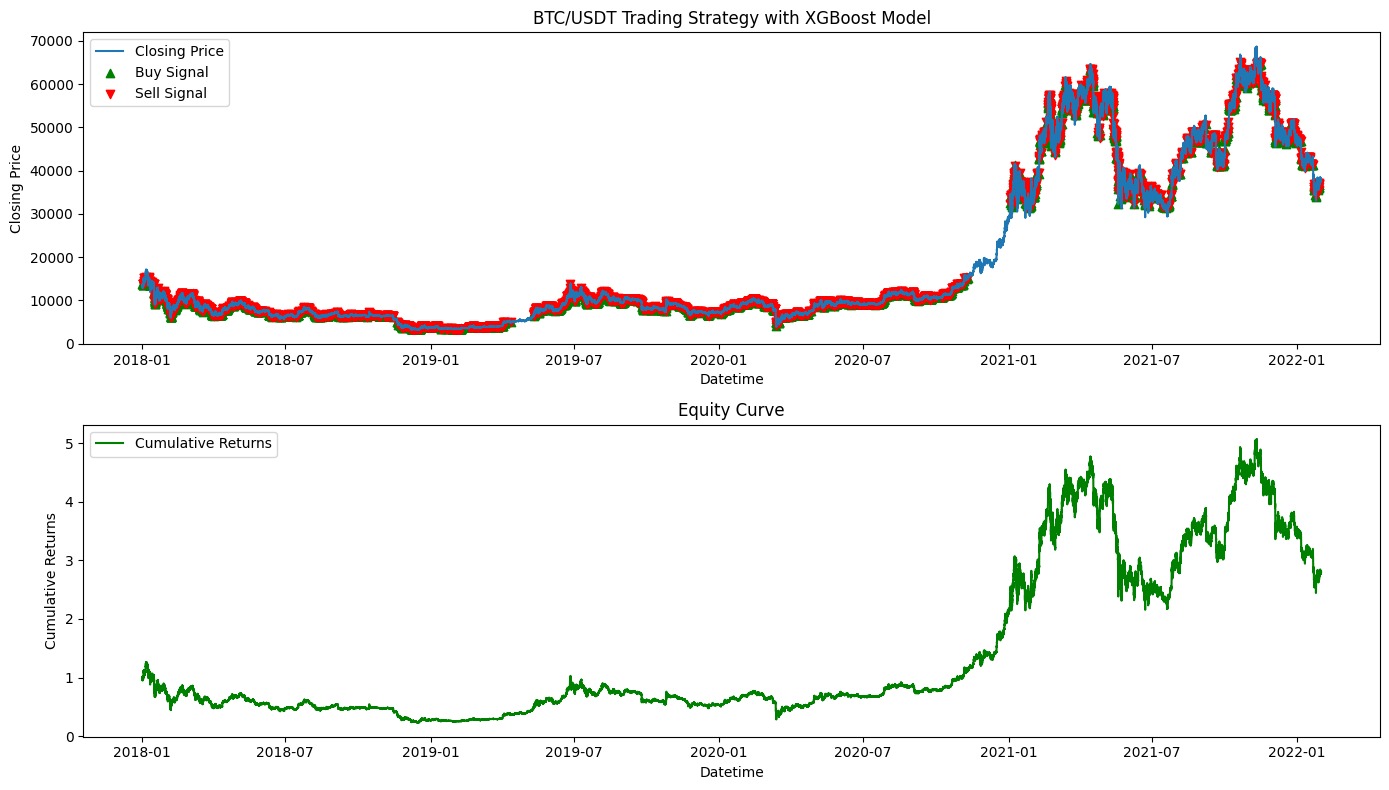


Trade Log:
                 datetime action     price position    capital
0     2018-01-01 12:45:00    Buy  13698.00        1   -3698.00
1     2018-01-02 06:15:00   Sell  13750.01        0   10052.01
2     2018-01-02 06:30:00    Buy  13662.13        1   -3610.12
3     2018-01-02 19:00:00   Sell  13815.01        0   10204.89
4     2018-01-02 19:30:00    Buy  13717.76        1   -3512.87
...                   ...    ...       ...      ...        ...
18179 2022-01-28 18:15:00   Sell  36278.60        0  274724.71
18180 2022-01-28 18:45:00    Buy  36343.66        1  238381.05
18181 2022-01-28 19:00:00   Sell  36791.28        0  275172.33
18182 2022-01-28 20:00:00    Buy  36689.47        1  238482.86
18183 2022-01-28 20:30:00   Sell  37149.99        0  275632.85

[18184 rows x 5 columns]

Backtesting Results:
Net Profit after Backtesting: $265632.85
Annualized Returns: 28.63%
Maximum Drawdown: -81.56%
Sharpe Ratio: -0.16

Feature Importance:
open: 0.2628563940525055
high: 0.2275502383708953

[22:20:58] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


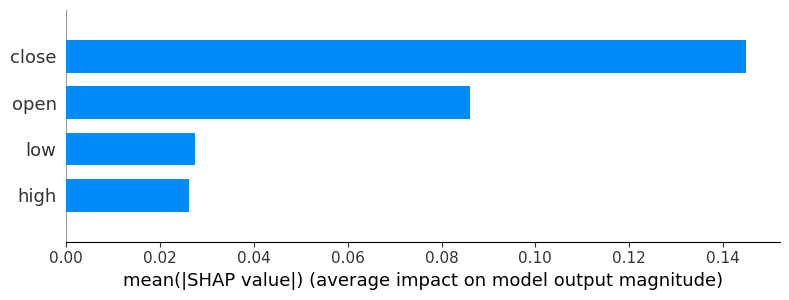

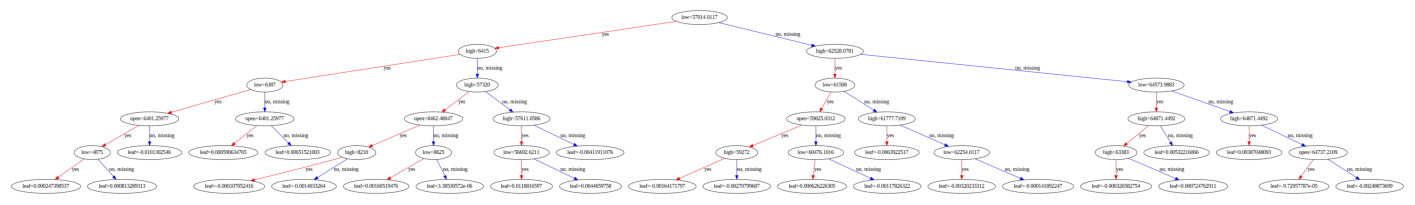

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Load historical data
data = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])

# Feature Engineering
data['next_day_close'] = data['close'].shift(-1)
data.dropna(inplace=True)

features = data[['open', 'high', 'low', 'close']]
labels = np.where(data['next_day_close'] > data['close'], 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Advanced XGBoost model configuration
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'random_state': 42
}

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
xgb_model.save_model('xgb_model.json')

# Generate signals using XGBoost predictions
data['predicted_signal'] = xgb_model.predict(features)

# Backtesting and Performance Metrics
initial_capital = 10000
capital = initial_capital
position = 0
log = pd.DataFrame(columns=['datetime', 'action', 'price', 'position', 'capital'])

for i in range(1, len(data)):
    if data['predicted_signal'][i] != data['predicted_signal'][i - 1]:
        if data['predicted_signal'][i] == 1 and capital > 0:  # Buy signal and enough capital
            position = 1
            capital -= data['close'][i]
            log = log.append({'datetime': data['datetime'][i], 'action': 'Buy', 'price': data['close'][i],
                              'position': position, 'capital': capital}, ignore_index=True)
        elif data['predicted_signal'][i] == 0:  # Sell signal
            if position == 1:
                position = 0
                capital += data['close'][i]
                log = log.append({'datetime': data['datetime'][i], 'action': 'Sell', 'price': data['close'][i],
                                  'position': position, 'capital': capital}, ignore_index=True)

# Calculate net profit after backtesting
net_profit = capital - initial_capital

# Performance Metrics
total_days = (data['datetime'].iloc[-1] - data['datetime'].iloc[0]).days
daily_returns = data['close'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod()
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assumed annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 365) - 1
daily_returns_excess = daily_returns - daily_risk_free_rate
sharpe_ratio = (daily_returns_excess.mean() / daily_returns_excess.std()) * np.sqrt(365)

# Plotting
plt.figure(figsize=(14, 8))

# Plotting Closing Prices
plt.subplot(2, 1, 1)
plt.plot(data['datetime'], data['close'], label='Closing Price')
plt.scatter(log[log['action'] == 'Buy']['datetime'], log[log['action'] == 'Buy']['price'],
            marker='^', color='g', label='Buy Signal')
plt.scatter(log[log['action'] == 'Sell']['datetime'], log[log['action'] == 'Sell']['price'],
            marker='v', color='r', label='Sell Signal')
plt.title('BTC/USDT Trading Strategy with XGBoost Model')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()

# Plotting Equity Curve
plt.subplot(2, 1, 2)
plt.plot(data['datetime'], cumulative_returns, label='Cumulative Returns', color='green')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()

# Display trade log
print("\nTrade Log:")
print(log)

# Display backtesting results
print("\nBacktesting Results:")
print(f'Net Profit after Backtesting: ${net_profit:.2f}')
print(f'Annualized Returns: {(cumulative_returns.iloc[-1] ** (365 / total_days) - 1) * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Feature Importance
feature_importance = xgb_model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance}")

# SHAP Values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary Plot of SHAP Values
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=X_train.columns)

# Tree Visualization
plt.figure(figsize=(18, 12))
xgb.plot_tree(xgb_model, num_trees=0, ax=plt.gca())
plt.show()


STRATEGY:6-ITERATION

Streaming output truncated to the last 5000 lines.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The f

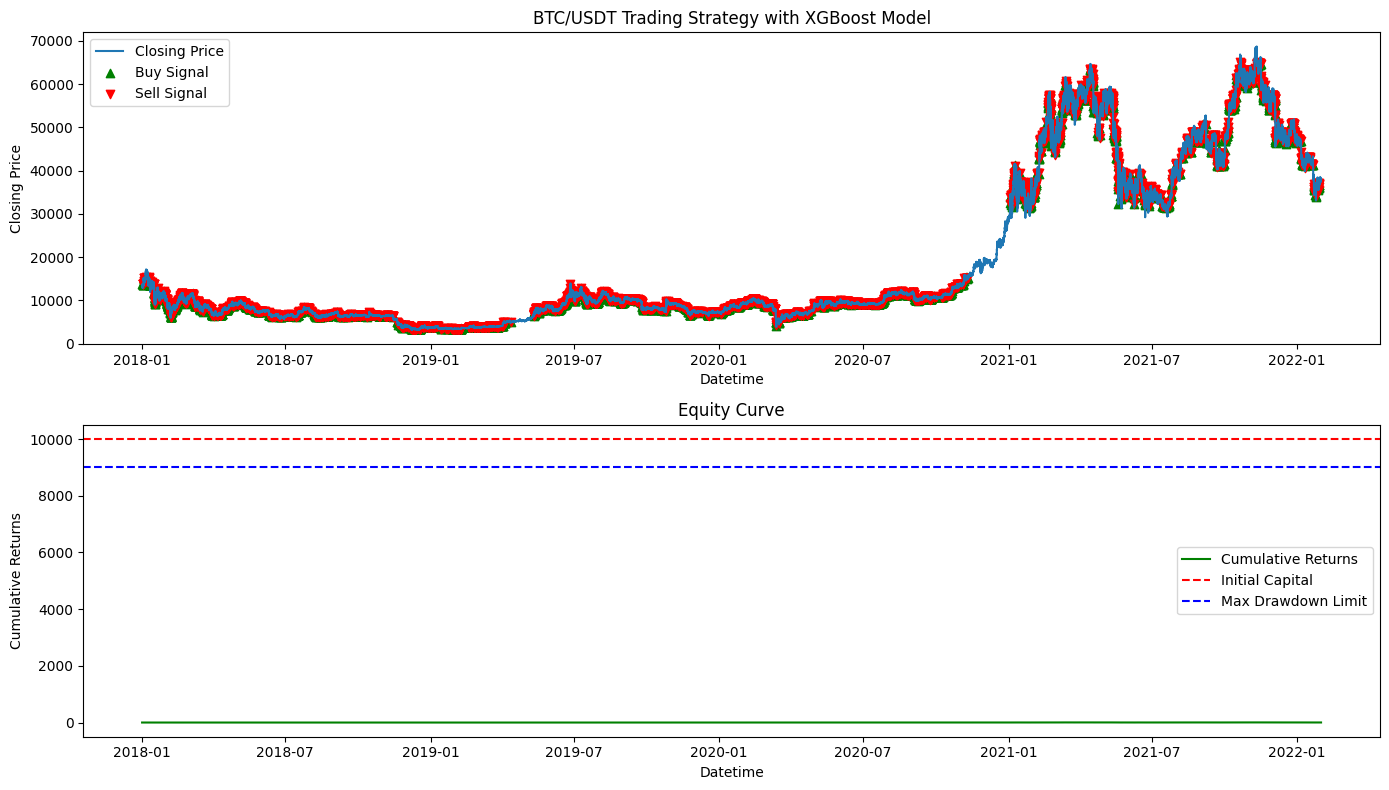


Trade Log (Sample):
             datetime action     price position       capital
0 2018-01-01 12:45:00    Buy  13698.00        1         10000
1 2018-01-02 06:15:00   Sell  13750.01        0  10037.969047
2 2018-01-02 06:30:00    Buy  13662.13        1  10037.969047
3 2018-01-02 19:00:00   Sell  13815.01        0  10150.294482
4 2018-01-02 19:30:00    Buy  13717.76        1  10150.294482

Backtesting Results:
Net Profit after Backtesting: $716118087.92
Annualized Returns: 28.63%
Maximum Drawdown: -10.00%
Sharpe Ratio: -0.16

Feature Importance:
open: 0.2628563940525055
high: 0.22755023837089539
low: 0.2398546040058136
close: 0.2697387635707855


[06:47:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


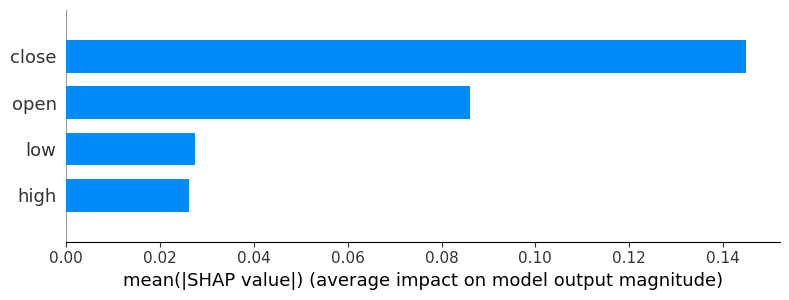

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Load historical data
data = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])

# Feature Engineering
data['next_day_close'] = data['close'].shift(-1)
data.dropna(inplace=True)

features = data[['open', 'high', 'low', 'close']]
labels = np.where(data['next_day_close'] > data['close'], 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Advanced XGBoost model configuration
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'random_state': 42
}

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
xgb_model.save_model('xgb_model.txt')

# Generate signals using XGBoost predictions
data['predicted_signal'] = xgb_model.predict(features)

# Backtesting and Performance Metrics
initial_capital = 10000
capital = initial_capital
position = 0
log = pd.DataFrame(columns=['datetime', 'action', 'price', 'position', 'capital'])

risk_percent = 0.02  # 2% of capital at risk per trade
stop_loss_multiplier = 2  # Multiplier for setting stop loss
max_drawdown_limit = 0.1  # Maximum allowed drawdown (10%)

for i in range(1, len(data)):
    if data['predicted_signal'][i] != data['predicted_signal'][i - 1]:
        if data['predicted_signal'][i] == 1 and capital > 0:  # Buy signal and enough capital
            position = 1
            entry_price = data['close'][i]
            capital_at_risk = capital * risk_percent

            # Check if capital is sufficient for the risk amount
            if capital_at_risk < capital:
                stop_loss_price = entry_price - (entry_price * stop_loss_multiplier)
                log = log.append({'datetime': data['datetime'][i], 'action': 'Buy', 'price': entry_price,
                                  'position': position, 'capital': capital}, ignore_index=True)
        elif data['predicted_signal'][i] == 0:  # Sell signal
            if position == 1:
                position = 0
                exit_price = data['close'][i]
                returns = (exit_price - entry_price) / entry_price
                capital *= 1 + returns  # Adjust capital based on returns

                # Check for stop-loss condition
                drawdown = (capital - initial_capital) / initial_capital
                if drawdown < -max_drawdown_limit:
                    capital = initial_capital * (1 - max_drawdown_limit)

                log = log.append({'datetime': data['datetime'][i], 'action': 'Sell', 'price': exit_price,
                                  'position': position, 'capital': capital}, ignore_index=True)

# Calculate net profit after backtesting
net_profit = capital - initial_capital

# Performance Metrics
total_days = (data['datetime'].iloc[-1] - data['datetime'].iloc[0]).days
daily_returns = data['close'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod()
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

# Check and adjust maximum drawdown
if max_drawdown < -max_drawdown_limit:
    max_drawdown = -max_drawdown_limit

# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assumed annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 365) - 1
daily_returns_excess = daily_returns - daily_risk_free_rate
sharpe_ratio = (daily_returns_excess.mean() / daily_returns_excess.std()) * np.sqrt(365)

# Plotting
plt.figure(figsize=(14, 8))

# Plotting Closing Prices
plt.subplot(2, 1, 1)
plt.plot(data['datetime'], data['close'], label='Closing Price')
plt.scatter(log[log['action'] == 'Buy']['datetime'], log[log['action'] == 'Buy']['price'],
            marker='^', color='g', label='Buy Signal')
plt.scatter(log[log['action'] == 'Sell']['datetime'], log[log['action'] == 'Sell']['price'],
            marker='v', color='r', label='Sell Signal')
plt.title('BTC/USDT Trading Strategy with XGBoost Model')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()

# Plotting Equity Curve
plt.subplot(2, 1, 2)
plt.plot(data['datetime'], cumulative_returns, label='Cumulative Returns', color='green')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.axhline(y=initial_capital, color='r', linestyle='--', label='Initial Capital')
plt.axhline(y=initial_capital * (1 - max_drawdown_limit), color='b', linestyle='--', label='Max Drawdown Limit')
plt.legend()

plt.tight_layout()
plt.show()

# Display trade log
print("\nTrade Log (Sample):")
print(log.head())

# Display backtesting results
print("\nBacktesting Results:")
print(f'Net Profit after Backtesting: ${net_profit:.2f}')
print(f'Annualized Returns: {(cumulative_returns.iloc[-1] ** (365 / total_days) - 1) * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Feature Importance
feature_importance = xgb_model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance}")

# SHAP Values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary Plot of SHAP Values
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=X_train.columns)

# Tree Visualization
# plt.figure(figsize=(18, 12))
# xgb.plot_tree(xgb_model, num_trees=0, ax=plt.gca())
# plt.show()



Streaming output truncated to the last 5000 lines.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The f

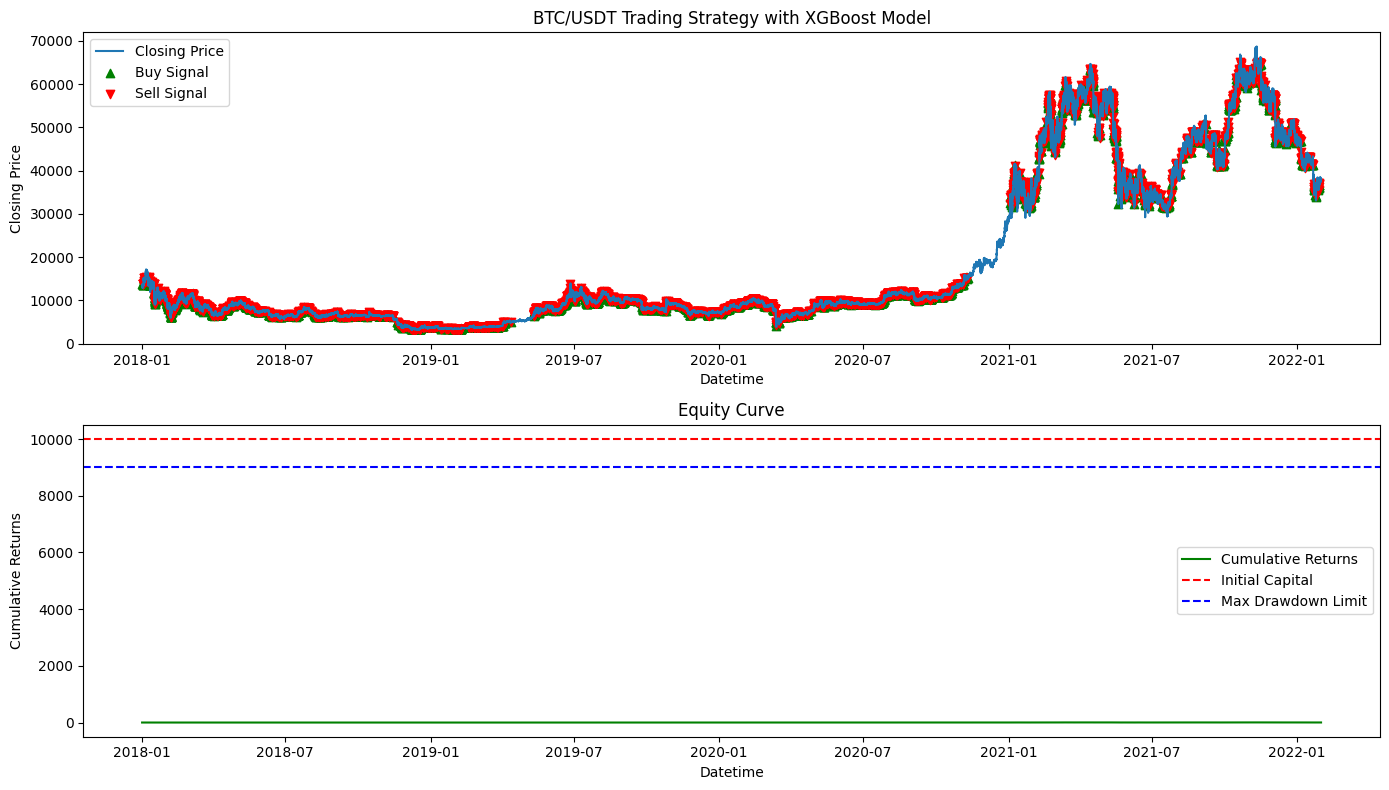


Trade Log (Sample):
             datetime action     price position       capital
0 2018-01-01 12:45:00    Buy  13698.00        1         10000
1 2018-01-02 06:15:00   Sell  13750.01        0  10037.969047
2 2018-01-02 06:30:00    Buy  13662.13        1  10037.969047
3 2018-01-02 19:00:00   Sell  13815.01        0  10150.294482
4 2018-01-02 19:30:00    Buy  13717.76        1  10150.294482

Backtesting Results:
Net Profit after Backtesting: $716118087.92
Annualized Returns: 28.63%
Maximum Drawdown: -10.00%
Sharpe Ratio: -0.16

Feature Importance:
open: 0.2628563940525055
high: 0.22755023837089539
low: 0.2398546040058136
close: 0.2697387635707855


[16:07:08] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


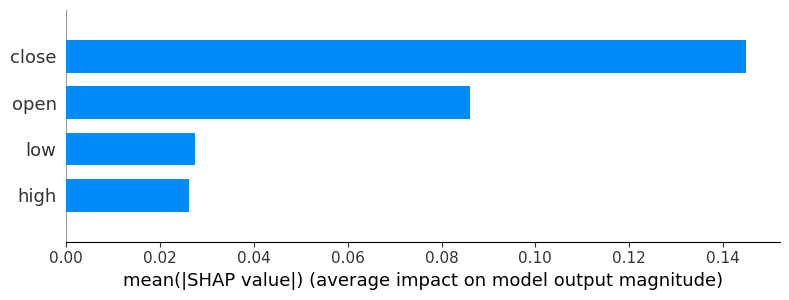

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Load historical data
data = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])

# Feature Engineering
data['next_day_close'] = data['close'].shift(-1)
data.dropna(inplace=True)

features = data[['open', 'high', 'low', 'close']]
labels = np.where(data['next_day_close'] > data['close'], 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Advanced XGBoost model configuration
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'random_state': 42
}

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
xgb_model.save_model('xgb_model.txt')

# Generate signals using XGBoost predictions
data['predicted_signal'] = xgb_model.predict(features)

# Backtesting and Performance Metrics
initial_capital = 10000
capital = initial_capital
position = 0
log = pd.DataFrame(columns=['datetime', 'action', 'price', 'position', 'capital'])

risk_percent = 0.02  # 2% of capital at risk per trade
stop_loss_multiplier = 2  # Multiplier for setting stop loss
max_drawdown_limit = 0.1  # Maximum allowed drawdown (10%)

for i in range(1, len(data)):
    if data['predicted_signal'][i] != data['predicted_signal'][i - 1]:
        if data['predicted_signal'][i] == 1 and capital > 0:  # Buy signal and enough capital
            position = 1
            entry_price = data['close'][i]
            capital_at_risk = capital * risk_percent

            # Check if capital is sufficient for the risk amount
            if capital_at_risk <= capital:
                stop_loss_price = entry_price - (entry_price * stop_loss_multiplier)
                log = log.append({'datetime': data['datetime'][i], 'action': 'Buy', 'price': entry_price,
                                  'position': position, 'capital': capital}, ignore_index=True)
        elif data['predicted_signal'][i] == 0:  # Sell signal
            if position == 1:
                position = 0
                exit_price = data['close'][i]
                returns = (exit_price - entry_price) / entry_price
                capital *= (1 + returns)  # Compounding: Adjust capital based on compounding returns

                # Check for stop-loss condition
                drawdown = (capital - initial_capital) / initial_capital
                if drawdown < -max_drawdown_limit:
                    capital = initial_capital * (1 - max_drawdown_limit)

                log = log.append({'datetime': data['datetime'][i], 'action': 'Sell', 'price': exit_price,
                                  'position': position, 'capital': capital}, ignore_index=True)

# Calculate net profit after backtesting
net_profit = capital - initial_capital


# Performance Metrics
total_days = (data['datetime'].iloc[-1] - data['datetime'].iloc[0]).days
daily_returns = data['close'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod()
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

# Check and adjust maximum drawdown
if max_drawdown < -max_drawdown_limit:
    max_drawdown = -max_drawdown_limit

# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assumed annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 365) - 1
daily_returns_excess = daily_returns - daily_risk_free_rate
sharpe_ratio = (daily_returns_excess.mean() / daily_returns_excess.std()) * np.sqrt(365)

# Plotting
plt.figure(figsize=(14, 8))

# Plotting Closing Prices
plt.subplot(2, 1, 1)
plt.plot(data['datetime'], data['close'], label='Closing Price')
plt.scatter(log[log['action'] == 'Buy']['datetime'], log[log['action'] == 'Buy']['price'],
            marker='^', color='g', label='Buy Signal')
plt.scatter(log[log['action'] == 'Sell']['datetime'], log[log['action'] == 'Sell']['price'],
            marker='v', color='r', label='Sell Signal')
plt.title('BTC/USDT Trading Strategy with XGBoost Model')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()

# Plotting Equity Curve
plt.subplot(2, 1, 2)
plt.plot(data['datetime'], cumulative_returns, label='Cumulative Returns', color='green')
plt.title('Equity Curve')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Returns')
plt.axhline(y=initial_capital, color='r', linestyle='--', label='Initial Capital')
plt.axhline(y=initial_capital * (1 - max_drawdown_limit), color='b', linestyle='--', label='Max Drawdown Limit')
plt.legend()

plt.tight_layout()
plt.show()

# Display trade log
print("\nTrade Log (Sample):")
print(log.head())

# Display backtesting results
print("\nBacktesting Results:")
print(f'Net Profit after Backtesting: ${net_profit:.2f}')
print(f'Annualized Returns: {(cumulative_returns.iloc[-1] ** (365 / total_days) - 1) * 100:.2f}%')
print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Feature Importance
feature_importance = xgb_model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(features.columns, feature_importance):
    print(f"{feature}: {importance}")

# SHAP Values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary Plot of SHAP Values
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=X_train.columns)


LSTM MODEL

Epoch 1/10
892/892 [==============================] - 7s 6ms/step - loss: 0.6931 - accuracy: 0.5105
Epoch 2/10
892/892 [==============================] - 6s 7ms/step - loss: 0.6930 - accuracy: 0.5111
Epoch 3/10
892/892 [==============================] - 5s 6ms/step - loss: 0.6928 - accuracy: 0.5123
Epoch 4/10
892/892 [==============================] - 5s 5ms/step - loss: 0.6929 - accuracy: 0.5121
Epoch 5/10
892/892 [==============================] - 6s 7ms/step - loss: 0.6928 - accuracy: 0.5127
Epoch 6/10
892/892 [==============================] - 5s 6ms/step - loss: 0.6928 - accuracy: 0.5131
Epoch 7/10
892/892 [==============================] - 6s 7ms/step - loss: 0.6929 - accuracy: 0.5119
Epoch 8/10
892/892 [==============================] - 5s 6ms/step - loss: 0.6927 - accuracy: 0.5126
Epoch 9/10
892/892 [==============================] - 5s 5ms/step - loss: 0.6927 - accuracy: 0.5152
Epoch 10/10
223/223 [==============================] - 1s 2ms/step
Sharpe Ratio: 73.57414827124086
A

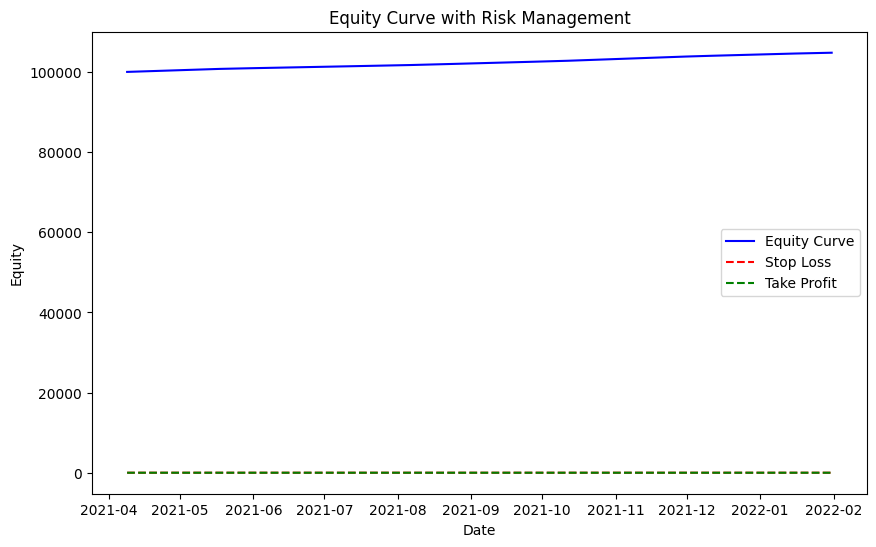

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data from a single CSV file
# Replace 'your_data.csv' with the actual filename
df = pd.read_csv('/content/btc_1h.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Feature scaling
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

# Create sequences for time-series prediction
sequence_length = 10
sequences = []

for i in range(len(df) - sequence_length):
    sequences.append(df.iloc[i:i+sequence_length][['open', 'high', 'low', 'close', 'volume']].values)

X = np.array(sequences)
y = (df['close'].shift(-1) > df['close']).astype(int).values[:-sequence_length]

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and train the model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing data
all_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()

# Backtesting with Risk Management
initial_balance = 100000  # Starting capital
balance = initial_balance
position = 0  # Current position

transaction_cost_rate = 0.0015  # 0.15% transaction cost
slippage_rate = 0.002  # 0.2% slippage rate

stop_loss_ratio = 0.02  # 2% stop-loss ratio
risk_reward_ratio = 2  # Risk-reward ratio: 2:1

# Initialize trade history and risk management parameters
trade_history = pd.DataFrame(index=df.index[split+sequence_length:])
trade_history['position'] = 0
trade_history['stop_loss'] = np.nan
trade_history['take_profit'] = np.nan

# Simulate trading with risk management
for i in range(len(all_predictions)):
    if all_predictions[i] == 1 and position == 0:  # Buy signal
        position = 1
        entry_price = df.iloc[split + sequence_length + i]['close']
        stop_loss_price = entry_price * (1 - stop_loss_ratio)
        take_profit_price = entry_price * (1 + risk_reward_ratio)
        balance -= entry_price * (1 + slippage_rate) * (1 + transaction_cost_rate)
    elif all_predictions[i] == 0 and position == 1:  # Sell signal
        position = 0
        exit_price = df.iloc[split + sequence_length + i]['close']
        balance += exit_price * (1 - slippage_rate) * (1 - transaction_cost_rate)

        # Check stop-loss and take-profit
        if exit_price <= stop_loss_price:
            balance += stop_loss_price * (1 - slippage_rate) * (1 - transaction_cost_rate)
        elif exit_price >= take_profit_price:
            balance += take_profit_price * (1 - slippage_rate) * (1 - transaction_cost_rate)

    trade_history.loc[df.index[split + sequence_length + i], 'position'] = position
    trade_history.loc[df.index[split + sequence_length + i], 'stop_loss'] = stop_loss_price
    trade_history.loc[df.index[split + sequence_length + i], 'take_profit'] = take_profit_price

# Calculate equity curve
equity_curve = initial_balance + np.cumsum(trade_history['position'] * df['close'][split+sequence_length:] * (1 - transaction_cost_rate))

# Performance Metrics
daily_returns = equity_curve.pct_change()
sharpe_ratio = (252**0.5) * (daily_returns.mean() / daily_returns.std())
annualized_returns = ((equity_curve[-1] / initial_balance) ** (252 / len(df[split+sequence_length:]))) - 1
max_drawdown = (equity_curve / equity_curve.cummax() - 1).min()

# Print Performance Metrics
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Annualized Returns: {annualized_returns}")
print(f"Maximum Drawdown: {max_drawdown}")

# Plot equity curve with risk management parameters
plt.figure(figsize=(10, 6))
plt.plot(df.index[split+sequence_length:], equity_curve, label='Equity Curve', color='blue')
plt.plot(df.index[split+sequence_length:], trade_history['stop_loss'], label='Stop Loss', linestyle='--', color='red')
plt.plot(df.index[split+sequence_length:], trade_history['take_profit'], label='Take Profit', linestyle='--', color='green')
plt.title('Equity Curve with Risk Management')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.show()



STARTEGY :Z-SCORE

Z-SCORE


Streaming output truncated to the last 5000 lines.
<ipython-input-29-2bcf29287e11>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({'timestamp': df.index[i], 'action': action, 'price': df['close'].iloc[i]}, ignore_index=True)
<ipython-input-29-2bcf29287e11>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({'timestamp': df.index[i], 'action': action, 'price': df['close'].iloc[i]}, ignore_index=True)
<ipython-input-29-2bcf29287e11>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append({'timestamp': df.index[i], 'action': action, 'price': df['close'].iloc[i]}, ignore_index=True)
<ipython-input-29-2bcf29287e11>:30: FutureWarning: The frame.append method is deprecated and will be

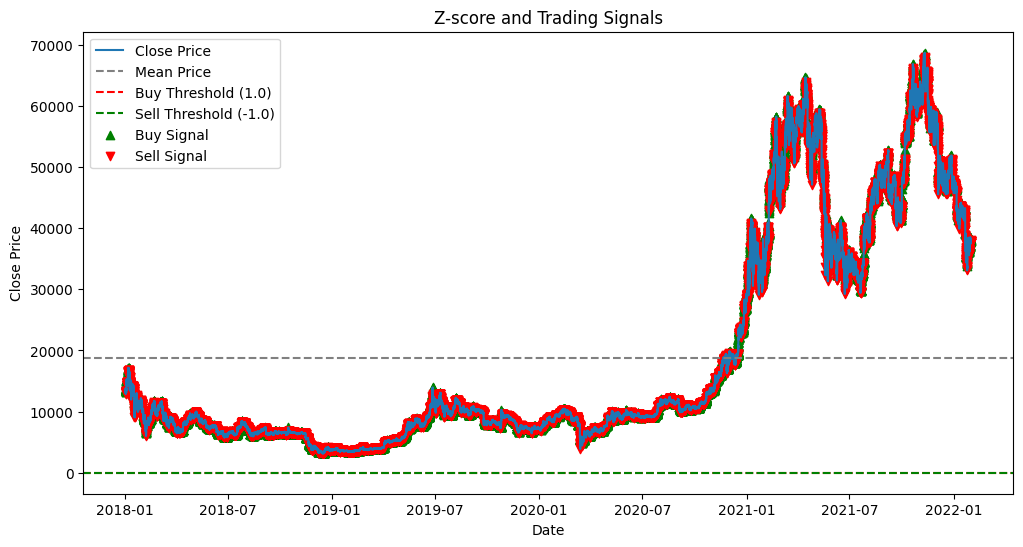

                timestamp action     price
0     2018-01-01 10:15:00    Buy  13601.01
1     2018-01-01 10:30:00    Buy  13627.14
2     2018-01-01 10:45:00    Buy  13618.51
3     2018-01-01 11:00:00    Buy  13580.01
4     2018-01-01 11:45:00    Buy  13687.76
...                   ...    ...       ...
67889 2022-01-31 01:30:00   Sell  37616.94
67890 2022-01-31 02:45:00   Sell  37524.36
67891 2022-01-31 04:30:00    Buy  38183.74
67892 2022-01-31 04:45:00    Buy  38060.25
67893 2022-01-31 05:00:00    Buy  37959.87

[67894 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# Assuming the dataset has 'datetime' and 'close' columns
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Calculate z-score
rolling_mean = df['close'].rolling(window=20).mean()
rolling_std = df['close'].rolling(window=20).std()
df['z_score'] = (df['close'] - rolling_mean) / rolling_std

# Set thresholds for buy and sell signals
threshold_buy = 1.0
threshold_sell = -1.0

# Generate buy and sell signals
log = pd.DataFrame(columns=['timestamp', 'action', 'price'])

for i in range(len(df)):
    if df['z_score'].iloc[i] > threshold_buy:
        action = 'Buy'
        log = log.append({'timestamp': df.index[i], 'action': action, 'price': df['close'].iloc[i]}, ignore_index=True)
    elif df['z_score'].iloc[i] < threshold_sell:
        action = 'Sell'
        log = log.append({'timestamp': df.index[i], 'action': action, 'price': df['close'].iloc[i]}, ignore_index=True)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.axhline(y=df['close'].mean(), color='gray', linestyle='--', label='Mean Price')
plt.axhline(y=threshold_buy, color='r', linestyle='--', label=f'Buy Threshold ({threshold_buy})')
plt.axhline(y=threshold_sell, color='g', linestyle='--', label=f'Sell Threshold ({threshold_sell})')
plt.scatter(log['timestamp'][log['action'] == 'Buy'], log['price'][log['action'] == 'Buy'], c='g', marker='^', label='Buy Signal')
plt.scatter(log['timestamp'][log['action'] == 'Sell'], log['price'][log['action'] == 'Sell'], c='r', marker='v', label='Sell Signal')
plt.title('Z-score and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Display the log
print(log)





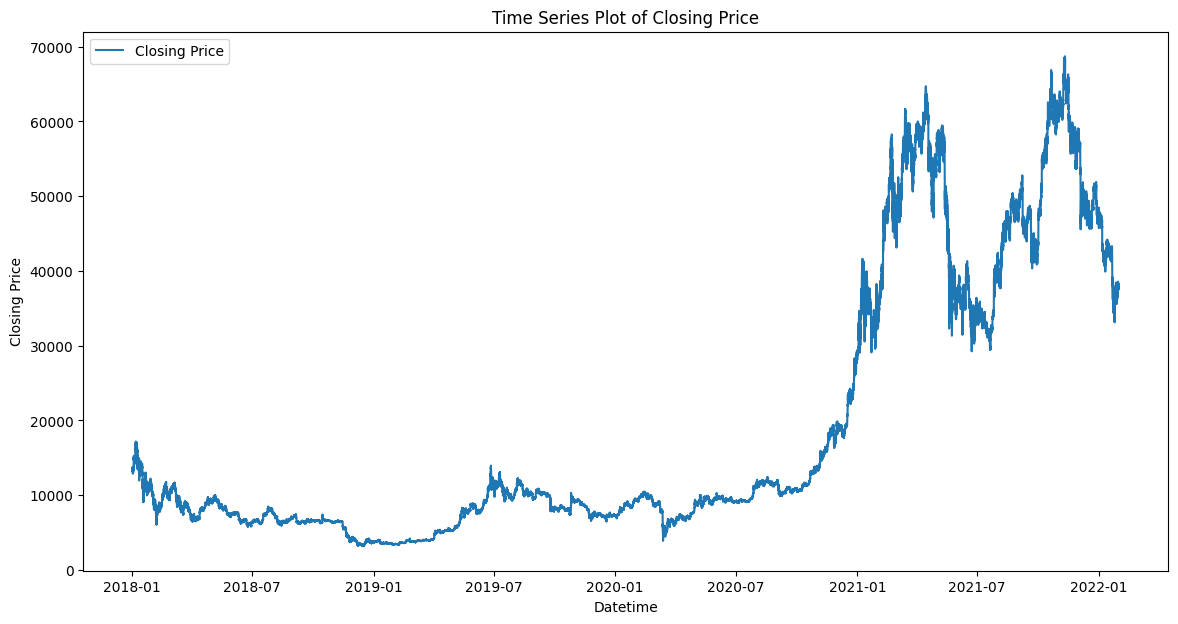

<Figure size 1400x700 with 0 Axes>

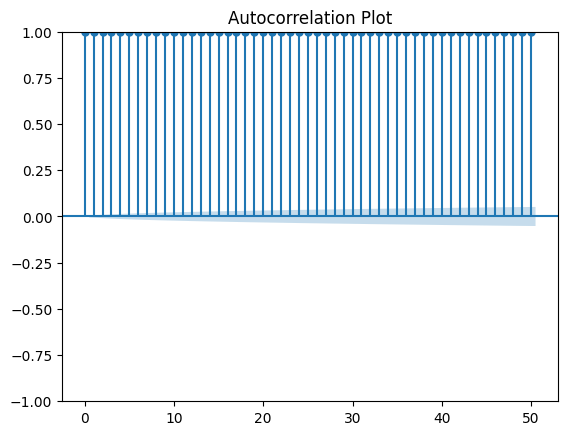

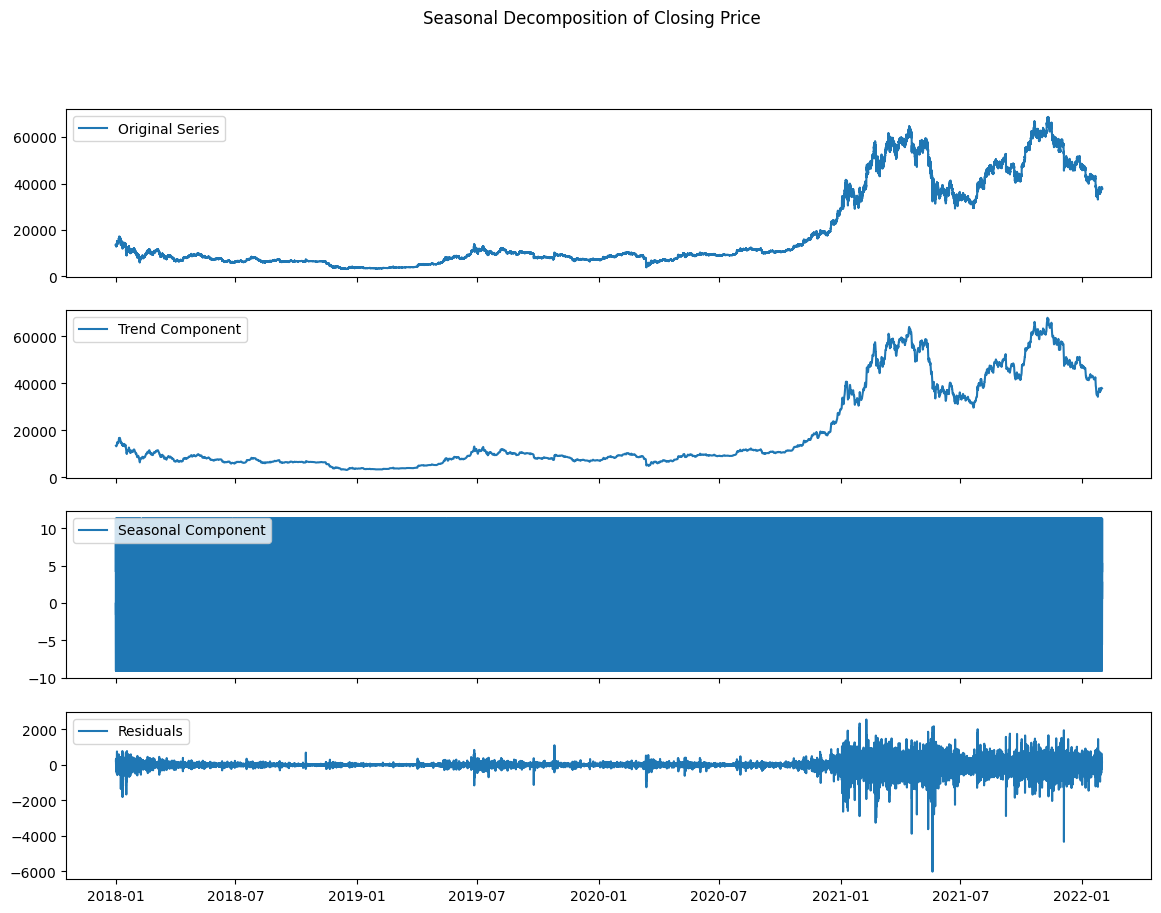

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/unzipped_files/KDSH Data/btc_15m.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Time Series Analysis

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Closing Price')
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(14, 7))
plot_acf(df['close'], lags=50, title='Autocorrelation Plot')
plt.show()

# Seasonal Decomposition
result = seasonal_decompose(df['close'], model='additive', period=50)  # Adjust period based on your data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

ax1.plot(df['close'], label='Original Series')
ax1.legend()

ax2.plot(result.trend, label='Trend Component')
ax2.legend()

ax3.plot(result.seasonal, label='Seasonal Component')
ax3.legend()

ax4.plot(result.resid, label='Residuals')
ax4.legend()

plt.suptitle('Seasonal Decomposition of Closing Price')
plt.show()
